# Proyecto Final Señales y Sistemas 2025 -2

## **Objetivo**: Implementar técnicas de representación en tiempo y frecuencia para el reconocimiento de señales de electroencefalografía (EEG) en tareas de imaginación motora (Motor Imagery)


![eegMI](https://figures.semanticscholar.org/288a54f091264377eccc99a19079c9387d66a78f/3-Figure2-1.png)

Las señales de EEG pueden ser ruidosas debido a diversas fuentes, incluidos artefactos fisiológicos e interferencias electromagnéticas. También pueden variar de persona a persona, lo que dificulta la extracción de características y la comprensión de las señales. Además, esta variabilidad, influenciada por factores genéticos y cognitivos, presenta desafíos para el desarrollo de soluciones independientes del sujeto. 

**Base de datos**: GiGaScience Database [https://gigadb.org/dataset/100295](https://gigadb.org/dataset/100295)

Ver Sección 3.1 en [Multimodal Explainability Using Class Activation Maps and Canonical Correlation for MI-EEG Deep Learning Classification](https://www.mdpi.com/2076-3417/14/23/11208)


## Instalamos las librerias necesarias

## Ejercicio 1
Consultar para qué sirven las siguientes librerías

### 1. `scipy.signal` (Procesamiento de Señales)

Este módulo es el corazón de la fase de Preprocesamiento y Representación en Frecuencia.

* `from scipy.signal import resample`: Se utiliza para cambiar la frecuencia de muestreo de la señal EEG. Es útil para estandarizar los datos a una misma frecuencia o reducir la complejidad computacional.
* `from scipy.signal import freqz`: Permite calcular la respuesta en frecuencia de un filtro digital. Esto es crucial para diseñar y verificar que los filtros (como los Pasa-Bajas, Pasa-Altas o de Rechazo de Banda) estén funcionando correctamente antes de aplicarlos.
* `from scipy.signal import filtfilt`: Aplica un filtro digital a los datos sin introducir un desplazamiento de fase (distorsión temporal). Es el método preferido para filtrar señales de EEG, ya que mantiene la alineación temporal de los eventos.
* `from scipy.signal import butter as bw`: Se utiliza para diseñar la forma matemática de un filtro Butterworth. Es el paso previo a usar `filtfilt`, donde se obtienen los coeficientes del filtro.

---

### 2. `numpy`, `pandas`, `random` (Manejo de Datos y Computación)

* `import numpy as np`: Es la librería fundamental para la computación numérica en Python. Las señales EEG se manejan como arrays N-dimensionales de NumPy (matrices de $canales \times puntos~de~tiempo$). Es esencial para todas las operaciones matemáticas y la manipulación de datos.
* `import pandas as pd`: Aunque menos central que NumPy en el procesamiento de señales puras, se usa para la gestión demetadatos, tablas de eventos o la organización de datos de sujetos y sesiones.
* `import random`: Útil para la generación de números pseudoaleatorios, como en la inicialización de pesos de clasificadores o la división aleatoria de los datos en conjuntos de entrenamiento y prueba.

---

### 3. `matplotlib.pyplot` (Visualización)

* `import matplotlib.pyplot as plt`: Es la librería estándar para visualización estática de datos en Python. Es crucial para:
    * Inspección Visual de señales EEG crudas y filtradas (pre-procesamiento).
    * Visualizar la respuesta en frecuencia de los filtros diseñados.
    * Generar espectrogramas(representación tiempo-frecuencia).
    * Graficar los resultados de la clasificación (p. ej., curvas ROC, matrices de confusión).

---

### 4. Librerías Específicas del Proyecto y BCI

* `from gcpds.databases import GIGA_MI_ME`: Este parece ser un módulo específico de la Universidad Nacional de Colombia (UN-GCPDS) para acceder y cargar conjuntos de datos de EEG de Imaginación Motora (MI), como el datasetGIGA. Esto te simplifica la fase de Adquisición/Selección de Datos.
* `from sklearn.base import BaseEstimator, TransformerMixin`: Estos son módulos de la librería `scikit-learn` y se utilizan si planeas crear tus propios pasos de procesamiento (como un extractor de características basado en PSD o CSP) que se integren perfectamente en los *pipelines* de `scikit-learn`.

## Librerías Externas para la Instalación

Las siguientes librerías son muy importantes para el contexto BCI:

* `mne`: Es la librería líder en Python para el análisis de datos EEG/MEG. Facilita la carga de archivos, la segmentación (*epoching*), la limpieza de artefactos (ICA) y la manipulación de estructuras de datos específicas de neurociencia.
* `braindecode`: Es un *framework* basado en PyTorch (o TensorFlow) diseñado específicamente para el aprendizaje profundo (Deep Learning) aplicado a datos de EEG. Contiene modelos de CNN listos para usar en tareas como Imaginación Motora.
* `tensorflow`: Una librería de aprendizaje automático (Machine Learning) de Google. Se usa para construir y entrenar modelos de clasificación avanzados (como CNN o LSTM) que utilicen tus características de tiempo-frecuencia, lo cual es la fase de Clasificación.


In [1]:
#!pip install tensorflow==2.15.0
!pip install mne==1.6.0
!pip install braindecode===0.7
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.databases

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: mne
    Found existing installation: mne 1.9.0
    Uninstalling mne-1.9.0:
      Successfully uninstalled mne-1.9.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 8.5 MB/s eta 0:00:00
  Cloning https://github.com/UN-GCPDS/python-gcpds.databases to /tmp/pip-req-build-4qroion4
  Running command git clone --filter=blob:none --quiet https://github.com/UN-GCPDS/python-gcpds.databases /tmp/pip-req-build-4qroion4
  Resolved https://github.com/UN-GCPDS/python-gcpds.databases to commit d174df9958b6638156dcfe03996a6307e631a6a2
  Preparing metadata (setup.py) ... done
  Created wheel for gcpds-databases: filename=gcpds_databases-0.2-py3-none-any.whl size=32972807 sha256=c035b90cd85763e9086acdc05a5e070664e0cdcaf6760728c3afbef4939903ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-q4n34yln/wheels/8e/66/a7

## Importamos algunas librerias necesarias

In [2]:
from scipy.signal import resample
from scipy.signal import freqz, filtfilt, resample
from scipy.signal import butter as bw
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from gcpds.databases import GIGA_MI_ME
from sklearn.base import BaseEstimator, TransformerMixin

## Funciones necesarias para el preprocesamiento leve de los datos

In [3]:
def load_GIGA(db,
              sbj,
              eeg_ch_names,
              new_fs,
              fs,
              f_bank=None,
              vwt=None,           
              run=None):

    index_eeg_chs = db.format_channels_selectors(channels = eeg_ch_names) - 1

    #tf_repr = TimeFrequencyRpr(sfreq = fs, f_bank = f_bank, vwt = vwt)

    db.load_subject(sbj)
    if run == None:
        X, y = db.get_data(classes = ['left hand mi', 'right hand mi']) #Load MI classes, all channels {EEG}, reject bad trials, uV
    else:
        X, y = db.get_run(run, classes = ['left hand mi', 'right hand mi']) #Load MI classes, all channels {EEG}, reject bad trials, uV
    X = X[:, index_eeg_chs, :] #spatial rearrangement
    #X = np.squeeze(tf_repr.transform(X))
    #Resampling
    if new_fs == fs:
        pass#print('No resampling, since new sampling rate same.')
    else:
        print("Resampling from {:f} to {:f} Hz.".format(fs, new_fs))
        X = resample(X, int((X.shape[-1]/fs)*new_fs), axis = -1)

    return X, y

def butterworth_digital_filter(X, N, Wn, btype, fs, axis=-1, padtype=None, padlen=0, method='pad', irlen=None):
  """
  Apply digital butterworth filter
  INPUT
  ------
  1. X: (D array)
    array with signals.
  2. N: (int+)
    The order of the filter.
  3. Wn: (float+ or 1D array)
    The critical frequency or frequencies. For lowpass and highpass filters, Wn is a scalar; for bandpass and bandstop filters, Wn is a length-2 vector.
    For a Butterworth filter, this is the point at which the gain drops to 1/sqrt(2) that of the passband (the “-3 dB point”).
    If fs is not specified, Wn units are normalized from 0 to 1, where 1 is the Nyquist frequency (Wn is thus in half cycles / sample and defined as 2*critical frequencies / fs). If fs is specified, Wn is in the same units as fs.
  4. btype: (str) {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}
    The type of filter
  5. fs: (float+)
    The sampling frequency of the digital system.
  6. axis: (int), Default=1.
    The axis of x to which the filter is applied.
  7. padtype: (str) or None, {'odd', 'even', 'constant'}
    This determines the type of extension to use for the padded signal to which the filter is applied. If padtype is None, no padding is used. The default is ‘odd’.
  8. padlen: (int+) or None, Default=0
    The number of elements by which to extend x at both ends of axis before applying the filter. This value must be less than x.shape[axis] - 1. padlen=0 implies no padding.
  9. method: (str), {'pad', 'gust'}
    Determines the method for handling the edges of the signal, either “pad” or “gust”. When method is “pad”, the signal is padded; the type of padding is determined by padtype
    and padlen, and irlen is ignored. When method is “gust”, Gustafsson’s method is used, and padtype and padlen are ignored.
  10. irlen: (int) or None, Default=nONE
    When method is “gust”, irlen specifies the length of the impulse response of the filter. If irlen is None, no part of the impulse response is ignored.
    For a long signal, specifying irlen can significantly improve the performance of the filter.
  OUTPUT
  ------
  X_fil: (D array)
    array with filtered signals.
  """
  b, a = bw(N, Wn, btype, analog=False, output='ba', fs=fs)
  return filtfilt(b, a, X, axis=axis, padtype=padtype, padlen=padlen, method=method, irlen=irlen)

class TimeFrequencyRpr(BaseEstimator, TransformerMixin):
  """
  Time frequency representation of EEG signals.

  Parameters
  ----------
    1. sfreq:  (float) Sampling frequency in Hz.
    2. f_bank: (2D array) Filter banks Frequencies. Default=None
    3. vwt:    (2D array) Interest time windows. Default=None
  Methods
  -------
    1. fit(X, y=None)
    2. transform(X, y=None)
  """
  def __init__(self, sfreq, f_bank=None, vwt=None):
    self.sfreq = sfreq
    self.f_bank = f_bank
    self.vwt = vwt
# ------------------------------------------------------------------------------

  def _validation_param(self):
    """
    Validate Time-Frequency characterization parameters.
    INPUT
    -----
      1. self
    ------
      2. None
    """
    if self.sfreq <= 0:
      raise ValueError('Non negative sampling frequency is accepted')


    if self.f_bank is None:
      self.flag_f_bank = False
    elif self.f_bank.ndim != 2:
      raise ValueError('Band frequencies have to be a 2D array')
    else:
      self.flag_f_bank = True

    if self.vwt is None:
      self.flag_vwt = False
    elif self.vwt.ndim != 2:
      raise ValueError('Time windows have to be a 2D array')
    else:
      self.flag_vwt = True

# ------------------------------------------------------------------------------
  def _filter_bank(self, X):
    """
    Filter bank Characterization.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, time_samples)
    OUTPUT
    ------
      1. X_f: (4D array) set of filtered EEG signals, shape (trials, channels, time_samples, frequency_bands)
    """
    X_f = np.zeros((X.shape[0], X.shape[1], X.shape[2], self.f_bank.shape[0])) #epochs, Ch, Time, bands
    for f in np.arange(self.f_bank.shape[0]):
      X_f[:,:,:,f] = butterworth_digital_filter(X, N=5, Wn=self.f_bank[f], btype='bandpass', fs=self.sfreq)
    return X_f

# ------------------------------------------------------------------------------
  def _sliding_windows(self, X):
    """
    Sliding Windows Characterization.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, time_samples)
    OUTPUT
    ------
      1. X_w: (4D array) shape (trials, channels, window_time_samples, number_of_windows)
    """
    window_lenght = int(self.sfreq*self.vwt[0,1] - self.sfreq*self.vwt[0,0])
    X_w = np.zeros((X.shape[0], X.shape[1], window_lenght, self.vwt.shape[0]))
    for w in np.arange(self.vwt.shape[0]):
        X_w[:,:,:,w] = X[:,:,int(self.sfreq*self.vwt[w,0]):int(self.sfreq*self.vwt[w,1])]
    return X_w

# ------------------------------------------------------------------------------
  def fit(self, X, y=None):
    """
    fit.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, time_samples)
      2. y: (1D array) target labels. Default=None
    OUTPUT
    ------
      1. None
    """
    pass

# ------------------------------------------------------------------------------
  def transform(self, X, y=None):
    """
    Time frequency representation of EEG signals.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, times)
    OUTPUT
    ------
      1. X_wf: (5D array) Time-frequency representation of EEG signals, shape (trials, channels, window_time_samples, number_of_windows, frequency_bands)
    """
    self._validation_param()     #Validate sfreq, f_freq, vwt

    #Avoid edge effects of digital filter, 1st:fbk, 2th:vwt
    if self.flag_f_bank:
        X_f = self._filter_bank(X)
    else:
        X_f = X[:,:,:,np.newaxis]

    if self.flag_vwt:
      X_wf = []
      for f in range(X_f.shape[3]):
        X_wf.append(self._sliding_windows(X_f[:,:,:,f]))
      X_wf = np.stack(X_wf, axis=-1)
    else:
      X_wf = X_f[:,:,:,np.newaxis,:]

    return X_wf

#plot eeg   
def plot_eeg(X,tv,ax,channels,esp=2,title=None):
    # X in CH x Samples
    n_canales = X.shape[0]

    for ch in range(n_canales): # canales
            xx = X[ch]
            xx = xx - np.mean(xx)
            xx = xx/np.max(abs(xx))
            ax.plot(tv, xx +(ch * esp), label=channels[ch])  # Desplazamos cada canal para visualización
    ax.set_yticks(range(0, esp * n_canales, esp), channels)  # Etiquetas en el eje Y
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Canales EEG [$\mu$V]")
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlim([min(tv)-0.01,max(tv)+0.01])
    ax.set_ylim([-esp,n_canales*esp+0.01])





      

## Establecemos el protocolo de pruebas y la configuración del montaje EEG

Describir el protocolo de captura de datos y el montaje utilizado


![mi](https://www.mdpi.com/diagnostics/diagnostics-13-01122/article_deploy/html/images/diagnostics-13-01122-g001.png)
![montaje](https://www.mdpi.com/applsci/applsci-14-11208/article_deploy/html/images/applsci-14-11208-g001.png)


##  Descripción del Montaje EEG

El diagrama a la derecha muestra el sistema de colocación de electrodos 10-20 estándar para la EEG.

* Este sistema define las ubicaciones de los electrodos en el cuero cabelludo basándose en porcentajes de las distancias entre puntos de referencia craneales (como el nasion y el inion).
* **Nomenclatura de Electrodos:** Los nombres de los electrodos indican la región cerebral que cubren:
    * **F:** Frontal
    * **C:** Central
    * **P:** Parietal
    * **T:** Temporal
    * **O:** Occipital
    * **Números Pares (derecha) / Impares (izquierda) / 'z' (línea media):** Indican la lateralidad y la posición anterior-posterior.
* **Aplicación en BCI (Motor Imagery):** En un proyecto de Interfaz Cerebro-Computadora (BCI) basado en **Imaginación Motora** (*Motor Imagery*), los electrodos más cruciales para la detección de la actividad relacionada con la planificación o ejecución motora se encuentran sobre la Corteza Motora.
    * Los electrodos clave incluyen C3, Cz y C4, ya que estos están posicionados sobre las áreas motoras primarias, donde se espera observar el fenómeno de Desincronización Relacionada con Eventos (*Event-Related Desynchronization*, **ERD**) y Sincronización Relacionada con Eventos (*Event-Related Synchronization*, **ERS**).


---

##  Descripción del Protocolo de Captura de Datos

El diagrama de la izquierda ilustra una única secuencia o trial del protocolo de imaginación motora, que se repite múltiples veces durante la sesión de registro. Este diseño es típico de experimentos de BCI que buscan evocar y registrar los patrones de EEG asociados con la imaginación de movimientos.

###  Secuencia del Trial (aproximadamente 5 segundos)

1.  **Periodo de Línea Base / Preparación (-2 a 0 segundos):**
    * El participante ve una pantalla que puede mostrar un signo de fijación (Screen), sirviendo como periodo de línea base para registrar la actividad cerebral sin la tarea motora.
2.  **Aparición de la Señal (*Cue*) (0 segundos):**
    * En T=0, aparece una señal (*cue*) que instruye al participante a realizar una acción mental específica.
    * En este caso, la señal es el texto "Left Hand" (Mano Izquierda) o "Right Hand" (Mano Derecha).
3.  **Periodo de Imaginación Motora (*Motor Imagery*) (0 a 4 segundos):**
    * El participante tiene aproximadamente 4 segundos (T=0 a T=4) para imaginar activamente el movimiento de la mano indicada (izquierda o derecha), sin moverla físicamente.
    * Este es el periodo crucial para la detección de la actividad EEG (ERD/ERS) en las bandas alfa ($\approx 8-12\text{ Hz}$) y beta ($\approx 15-30\text{ Hz}$) sobre C3 y C4.
4.  **Descanso / Fin del Trial (4 a 5 segundos):**
    * A partir de T=4, la pantalla puede volver a mostrar un signo de fijación (Screen ), indicando el fin del periodo de imaginación y el inicio de un breve periodo de descanso o recuperación.
5.  **Intervalo entre Trials (*Inter trials interval*) (~0.1 a 0.8 segundos):**
    * Hay un periodo variable de tiempo entre el final de un trial y el inicio del siguiente, asegurando que el participante no pueda anticipar el momento exacto de la siguiente señal. Este periodo añade aleatoriedad para evitar habituación y artefactos de anticipación.

Este protocolo permite registrar la actividad cerebral asociada con la imaginación de la mano izquierda (principalmente observable en C4) y la mano derecha (principalmente observable en C3), lo cual es la base para entrenar un modelo de clasificación en tu proyecto de Kaggle BCI.



In [4]:
channels = ['Fp1','Fpz','Fp2',
            'AF7','AF3','AFz','AF4','AF8',
            'F7','F5','F3','F1','Fz','F2','F4','F6','F8',
            'FT7','FC5','FC3','FC1','FCz','FC2','FC4','FC6','FT8',
            'T7','C5','C3','C1','Cz','C2','C4','C6','T8',
            'TP7','CP5','CP3','CP1','CPz','CP2','CP4','CP6','TP8',
            'P9','P7','P5','P3','P1','Pz','P2','P4','P6','P8','P10',
            'PO7','PO3','POz','PO4','PO8',
            'O1','Oz','O2',
            'Iz']

areas = {
    'Frontal': ['Fpz', 'AFz', 'Fz', 'FCz'],
    'Frontal Right': ['Fp2','AF4','AF8','F2','F4','F6','F8',],
    'Central Right': ['FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8',],
    'Posterior Right': ['P2','P4','P6','P8','P10','PO4','PO8','O2',],
    #'Central': ['Cz'],
    'Posterior': ['CPz','Pz', 'Cz','POz','Oz','Iz',],
    'Posterior Left': ['P1','P3','P5','P7','P9','PO3','PO7','O1',],
    'Central Left': ['FC1','FC3','FC5','FT7','C1','C3','C5','T7','CP1','CP3','CP5','TP7',],
    'Frontal Left': ['Fp1','AF3','AF7','F1','F3','F5','F7',],
}

arcs = [
    #'hemispheres',
    'areas',
    'channels',
]

## Definimos la ruta y los argumentos para la carga de los datos de EEG

In [5]:
db = GIGA_MI_ME('/kaggle/input/giga-science-gcpds/GIGA_MI_ME')
#ti = 0
#tf = 7
new_fs = 256.
load_args = dict(db = db,
                 eeg_ch_names = channels,
                 fs = db.metadata['sampling_rate'],
                 #f_bank = np.asarray([[4., 40.]]),
                 #vwt = np.asarray([[ti, tf]]), #2.5 - 5 MI
                 new_fs = new_fs)

## Cargamos los datos según el sujeto que se quiera

Si se quiere cargar los datos de todos los sujetos, aplicar un ciclo que itere la lista de sujetos y de esta forma se cargara uno por uno dependiendo lo que se desee realizar.

Por ejemplo:

for i in sbj:
    X, y = load_GIGA(sbj=sbj, **load_args)

In [6]:
sbj = 5
X, y = load_GIGA(sbj=sbj, **load_args)

Resampling from 512.000000 to 256.000000 Hz.


In [7]:
print(f'X con {X.shape[0]} intentos; {X.shape[1]} canales; {X.shape[2]} muestras No. de segundos {X.shape[2]/new_fs}')

X con 199 intentos; 64 canales; 1792 muestras No. de segundos 7.0


In [8]:
X.shape

(199, 64, 1792)

## Visualización de las señales de EEG en el tiempo

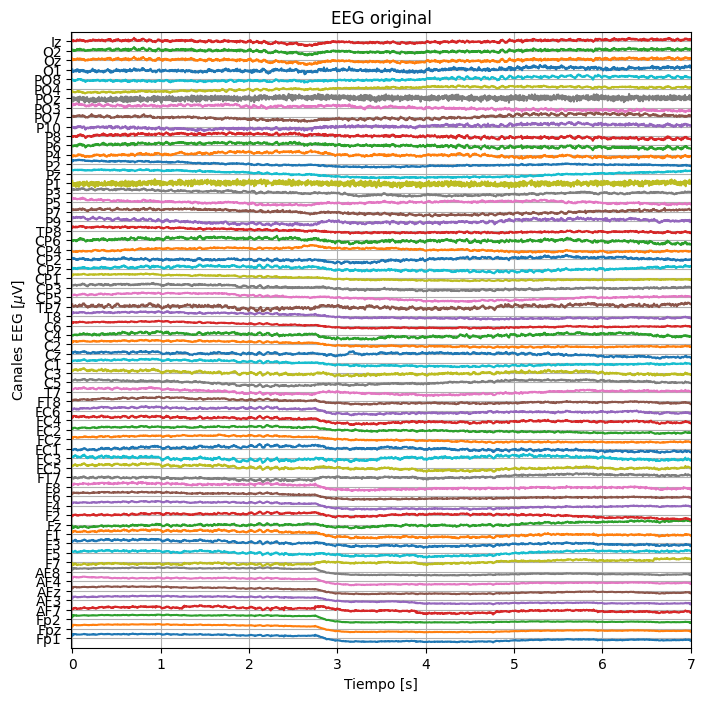

In [9]:
#graficar canales promedio
trial = 0
ti = 0 # ti
tf = 7 # tf
tv = np.arange(ti,tf,1/new_fs)

#Señal cruda
fig,ax = plt.subplots(1,1,figsize=(8,8),sharex = True)
# Graficar cada canal en un subplot banda respectiva

plot_eeg(X[trial],tv,ax=ax,channels=channels,title='EEG original')
plt.show()

# Ejercicio 2

Discuta la gráfica anterior



##  Análisis de la Señal EEG Original

Es la representación en el dominio del tiempo de la actividad EEG multicanal, donde cada línea horizontal representa un electrodo (canal) medido en microvoltios ($\mu \text{V}$) a lo largo de 7 segundos.

### 1. **Componentes Clave y Montaje**

* **Canales EEG (Eje Y):** Se observan múltiples canales etiquetados, indicando el uso de un montaje de alta densidad que incluye ubicaciones del sistema 10-20 (como Fp1, Fp2, C3, C4, Oz, etc.) junto con canales intermedios (como FCz, CPz, etc.).
* **Regiones Focales:** Para la tarea de Imaginación Motora de tu proyecto, los canales más críticos son los centrales (alrededor de C3, Cz, y C4) ya que cubren la Corteza Motora Primaria .
* **Amplitud:** La amplitud de las oscilaciones está dentro del rango típico de las señales EEG (microvoltios), pero está dominada por componentes no cerebrales (ruido), como se detalla a continuación.

---

### 2. **Identificación de Artefactos y Ruido**

La señal original se encuentra fuertemente contaminada por diversos artefactos, lo que requiere un preprocesamiento riguroso. Los principales problemas identificados son:

* **Ruido de Línea Eléctrica (Interferencia Electromagnética):**
    * **Observación:** Se nota una oscilación rápida, de alta frecuencia y uniforme superpuesta en casi todos los canales.
    * **Implicación:** Esto se debe a la interferencia de la red eléctrica (50 Hz o 60 Hz). Es el ruido más común y debe eliminarse con un Filtro Notch.

* **Deriva de la Línea Base (Artefacto de Baja Frecuencia):**
    * **Observación:** La señal de muchos canales presenta cambios lentos y graduales en su línea de base a lo largo de los 7 segundos.
    * **Implicación:** Esta deriva se debe a cambios en la impedancia de los electrodos o movimientos respiratorios/sudoración. Debe eliminarse con un Filtro Pasa-Alto (*High-Pass*), típicamente con una frecuencia de corte entre 0.1 Hz y 1 Hz.

* **Artefacto de Transición/Movimiento (Alrededor de $T=3$ s):**
    * **Observación:** Se evidencia un cambio brusco y coordinado en el *offset* de la señal en múltiples canales alrededor de los 3 segundos.
    * **Implicación:** Podría ser un artefacto de movimiento (cabeza, cuello), un artefacto ocular (parpadeo grande), o una marca de evento experimental (marker). Si no es un marcador de evento, este segmento debe ser manipulado o el artefacto debe ser removido (ej. con ICA o rechazo de época).

* **Artefactos Oculares (EOG):**
    * **Observación:** Aunque no se aprecia un parpadeo clásico en esta ventana de 7 segundos, los canales más cercanos a los ojos (Fp1, Fp2) suelen tener la mayor amplitud y son muy sensibles al movimiento ocular y parpadeos.
    * **Implicación:** Estos artefactos suelen tener una amplitud mucho mayor que las señales cerebrales y deben ser corregidos, a menudo utilizando ICA (Independent Component Analysis).



Nota: Discuta en qué consisten los ritmos cerebrales

![montaje](https://cdn.shopify.com/s/files/1/0348/7053/files/storage.googleapis.com-486681944373284_61cb9936-f6c2-493d-8402-3426d7f5a049_1024x1024.jpg?v=1689309340)



##  Consistencia y Características de los Ritmos Cerebrales

Los ritmos cerebrales son patrones de actividad eléctrica cerebral oscilatoria que se registran mediante el EEG. Se clasifican por su rango de frecuencia, y cada ritmo se asocia con diferentes estados de conciencia y funciones cognitivas.

### 1. Delta ($\delta$)
* **Rango de Frecuencia:** $0.5 - 4 \text{ Hz}$.
* **Consistencia:** Son las ondas más lentas y de mayor amplitud.
* **Estado Asociado:** Sueño profundo sin sueños (*deep sleepless*), pérdida de la conciencia corporal, y procesos de reparación y recuperación del organismo. 
### 2. Theta ($\theta$)
* **Rango de Frecuencia:** $4 - 8 \text{ Hz}$.
* **Consistencia:** Ondas lentas, que se asocian a un estado de conciencia reducida.
* **Estado Asociado:** Creatividad, *insight*, estados de ensueño, meditación profunda, y la transición hacia el sueño ligero.

### 3. Alpha ($\alpha$)
* **Rango de Frecuencia:** $8 - 13 \text{ Hz}$.
* **Consistencia:** Son ondas de frecuencia media, notablemente rítmicas cuando la persona está relajada.
* **Estado Asociado:** Físicamente y mentalmente relajado, pero aún despierto. En el contexto de tu proyecto, la actividad en la banda alfa sobre la corteza motora (conocida como ritmo $\mu$ o *mu*) se suprime (**desincronización, ERD**) cuando se realiza la imaginación de un movimiento.

### 4. Beta ($\beta$)
* **Rango de Frecuencia:** $13 - 32 \text{ Hz}$.
* **Consistencia:** Ondas rápidas y de menor amplitud que las alfa.
* **Estado Asociado:** Conciencia de alerta (*awake, alert consciousness*), pensamiento activo, excitación y concentración en tareas específicas. Esta banda también es crítica en el *Motor Imagery*, donde se observa supresión o aumento (**sincronización, ERS**) en respuesta a la tarea.

### 5. Gamma ($\gamma$)
* **Rango de Frecuencia:** $32 - 100 \text{ Hz}$ (o incluso más alto).
* **Consistencia:** Son las ondas más rápidas y de muy baja amplitud.
* **Estado Asociado:** Percepción intensificada (*heightened perception*), aprendizaje, solución de problemas complejos (*problem solving tasks*), y procesamiento cognitivo de alto nivel.

---

##  Relevancia para tu Proyecto de Imaginación Motora (BCI)

El BCI (Brain-Computer Interface) se enfoca directamente en las bandas Alpha ($\mu$) y Beta ($\beta$).

* El objetivo es detectar el cambio de potencia en estas bandas sobre los electrodos centrales (C3 y C4) durante el periodo de imaginación motora (T=0 a T=4 s).
* Cuando un sujeto imagina mover, por ejemplo, la mano derecha, la potencia en las bandas $\mu$ y $\beta$ sobre el hemisferio motor izquierdo (electrodos C3) disminuye (ERD).
* Este cambio de potencia es la característica fundamental que tu clasificador en Kaggle debe aprender a reconocer para diferenciar entre la imaginación de la mano izquierda y la mano derecha.


In [10]:
# filtramos trials completos en ritmos cerebrales utilizando filtros IIR


f_bank = np.array([[0.5,4.],[4., 8.],[8.,13.],[13.,32.],[32.,100.]])
vwt = np.asarray([[ti, tf]]) #2.5 - 5 MI 0 - 7 trial completo
tf_repr = TimeFrequencyRpr(sfreq = new_fs, f_bank = f_bank)

Xrc = np.squeeze(tf_repr.transform(X))

Xrc.shape

(199, 64, 1792, 5)

# Ejercicio 3

Expliqué cómo se calcularon cada una de las 5 dimensiones del arreglo Xrc



##  Análisis y Justificación Metodológica de las 5 Dimensiones de `Xrc`

El arreglo `Xrc` es la salida clave del preprocesamiento y se utiliza para transformar los datos crudos de EEG en un formato estructurado y significativo para los algoritmos de Machine Learning. El arreglo resultante $\text{Xrc.shape} = (199, 64, 1792, 5)$ tiene su justificación en la necesidad de conservar la información Temporal, Espacial, y Espectral de la señal.

---

### 1. Primera Dimensión: La Dimensión Epocal/Segmentada (199)

* **Justificación Metodológica:** En BCI, el objetivo es clasificar una respuesta cerebral específica a un estímulo (el *cue* de Imaginación Motora). Por lo tanto, el flujo de datos continuo debe ser cortado en segmentos discretos (épocas o trials).
* **Cálculo/Origen:** El valor 199 se calcula contando los eventos registrados por el sistema de adquisición que marcan el inicio de cada tarea de imaginación motora, según el protocolo experimental .
* **Propósito en el ML:** Esta dimensión se convierte en el número de muestras que el modelo de clasificación utilizará para el entrenamiento y la validación.

---

### 2. Segunda Dimensión: La Dimensión Espacial/Canal (64)

* **Justificación Metodológica:** El EEG es una técnica de mapeo espacial. Es crucial saber de dónde proviene la actividad cerebral. El valor 64 refleja el diseño de la gorra de electrodos de alta densidad utilizada.
* **Cálculo/Origen:** El valor 64 se deriva de la configuración física de la adquisición de datos, la cual está preestablecida en la cabecera del archivo. Corresponde al número de sensores colocados estratégicamente sobre la Corteza Motora y otras áreas para capturar la actividad del potencial eléctrico del cerebro.
* **Propósito en el ML:** Esta dimensión es la entrada espacial del modelo, donde las capas convolucionales (CNN) pueden buscar patrones a través de los electrodos (por ejemplo, la diferencia de actividad entre C3 y C4).

---

### 3. Tercera Dimensión: La Dimensión Temporal (1792)

* **Justificación Metodológica:** Los patrones de Imaginación Motora (ERD/ERS) son fenómenos que evolucionan en el tiempo. Es esencial que el arreglo preserve la secuencia de la señal para capturar esta evolución temporal.
* **Cálculo/Origen:** El valor 1792 es el resultado de la relación directa entre el periodo de análisis del trial (ej. 7 segundos) y la frecuencia de muestreo** ($\text{new\_fs}$). Si la señal fue muestreada a $256 \text{ Hz}$, $7 \text{ s} \times 256 \text{ Hz} = 1792$ puntos de tiempo.
* **Propósito en el ML:** Esta dimensión alimenta los modelos secuenciales (RNN) o las convoluciones temporales, permitiendo al algoritmo analizar cómo se desarrolla el patrón $\mu$ y $\beta$ a lo largo de los 4 segundos de la tarea de imaginación.

---

### 4. Cuarta Dimensión: La Dimensión **Espectral/Frecuencia** (5)

* **Justificación Metodológica:** La actividad cerebral se caracteriza mejor por su contenido frecuencial (los ritmos cerebrales) que por sus voltajes brutos. La Imaginación Motora, en particular, se define por cambios en las bandas $\alpha$ ($\mu$) y $\beta$.
* **Cálculo/Origen:** El valor 5 se impone de forma explícita por tu código, contando las 5 bandas definidas en el arreglo `f_bank`. Cada banda genera una nueva versión filtrada de la señal para cada canal, lo que se conoce como filtrado multicanal de banco de filtros.
* **Propósito en el ML:** Esta dimensión permite al clasificador aislar y ponderar la importancia de la potencia en cada ritmo (Delta, Theta, Alpha, Beta, Gamma) para distinguir entre las clases de la tarea.

---

### 5. Quinta Dimensión: La Dimensión de **Representación** (Implícita)

* **Justificación Metodológica:** Cuando se realiza una representación tiempo-frecuencia o un filtrado complejo, la función puede generar múltiples valores para cada punto (ej. la magnitud y la fase).
* **Cálculo/Origen:** La función `tf_repr.transform()` crea internamente una dimensión extra de tamaño 1 para indicar que el arreglo contiene un único tipo de característica (por ejemplo, el voltaje filtrado en esa banda). La función `np.squeeze()` se utiliza para limpiar esta dimensión superflua antes de pasar los datos al modelo.




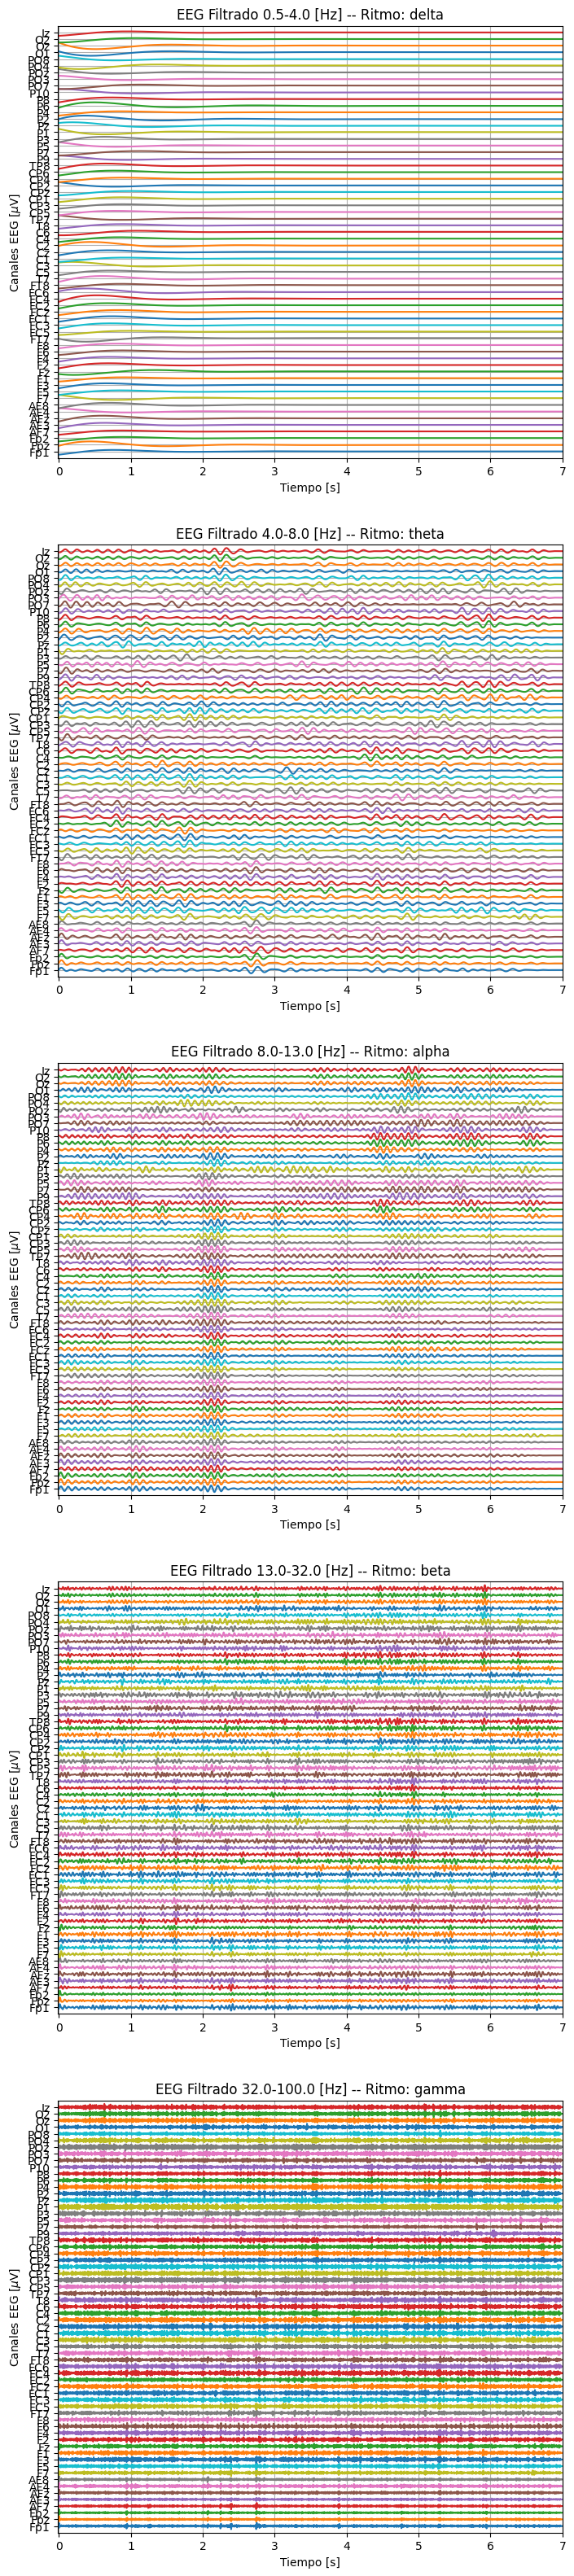

In [11]:
import matplotlib.pyplot as plt

ritmo = ['delta','theta','alpha','beta','gamma']
trial = 0
n_trials, n_canales, n_muestras, n_bands = Xrc.shape  # Simulación de datos

esp = 2 #espaciado canales
fig,ax = plt.subplots(5,1,figsize=(8,40))
# Graficar cada canal en un subplot banda respectiva
for b in range(f_bank.shape[0]): #bandas
    plot_eeg(Xrc[trial,:,:,b],tv,ax=ax[b],channels=channels,title=f'EEG Filtrado {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]}')
plt.show()

## Visualización de las señales de EEG en la frecuencia

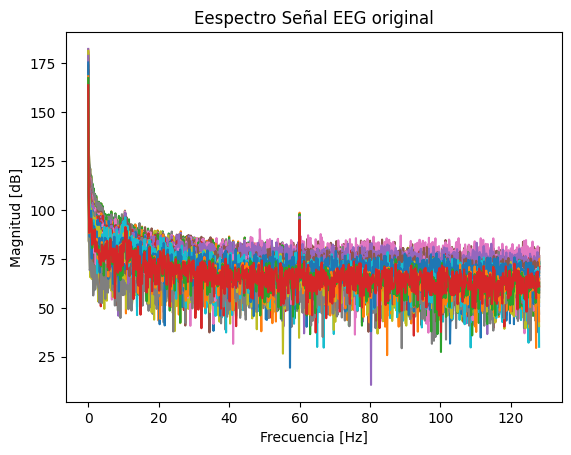

In [12]:
#señal orignal
Xwo = np.fft.rfft(X,axis=-1)
vfreq = np.fft.rfftfreq(X.shape[2],1/new_fs)

Xwo.shape
plt.plot(vfreq,20*np.log10(np.abs(Xwo[trial])).T)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Eespectro Señal EEG original')
plt.show()


## Ejercicio 4

Discuta la gráfica anterior



##  Análisis del Espectro de Señal EEG Original

La gráfica muestra el resultado de aplicar la Transformada Rápida de Fourier (FFT) a tu señal EEG original. El objetivo es mover los datos del dominio del tiempo al dominio de la frecuencia para ver qué frecuencias tienen la mayor magnitud (o potencia).

### 1. Ejes de la Gráfica

* **Eje X (Frecuencia [Hz]):** Muestra el rango de frecuencias analizado, desde $0 \text{ Hz}$ hasta aproximadamente $128 \text{ Hz}$ (la mitad de tu frecuencia de muestreo si $\text{new\_fs} = 256 \text{ Hz}$, conocido como la Frecuencia de Nyquist).
* **Eje Y (Magnitud [dB]):** Muestra la intensidad o potencia de la señal en decibelios (dB) para cada frecuencia. Cada línea de color representa un canal EEG diferente.

### 2. Observaciones Clave y Artefactos

Este espectro confirma los artefactos que ya habíamos observado en la gráfica de EEG en el dominio del tiempo:

* **Poder de Baja Frecuencia (Deriva de la Línea Base):**
    * La característica más dominante es la magnitud extremadamente alta que comienza en $0 \text{ Hz}$ y cae bruscamente hasta aproximadamente $1 \text{ Hz}$.
    * **Interpretación:** Esto se debe a la deriva de la línea base y artefactos de movimiento muy lentos. Esta energía de muy baja frecuencia no es actividad cerebral y debe ser eliminada mediante un Filtro Pasa-Alto (High-Pass) con una frecuencia de corte entre $0.5 \text{ Hz}$ y $1 \text{ Hz}$.

* **Picos del Ruido de Línea Eléctrica (Artefacto de 50/60 Hz):**
    * **Busca Picos Agudos:** Aunque no son los más grandes, si tu registro fue en una región con un estándar de $60 \text{ Hz}$, deberías ver un pico agudo y estrecho alrededor de esa frecuencia. Si fue en una región con estándar de $50 \text{ Hz}$, el pico aparecería allí.
    * **Interpretación:** Este pico es la interferencia electromagnética que ya habíamos visto como oscilación rápida en la señal temporal. Se elimina con un **Filtro Notch** (Banda Eliminada).

* **Domino de Baja Frecuencia:**
    * El espectro muestra que la mayor parte de la energía (magnitud) se concentra por debajo de $10 \text{ Hz}$. Esto es normal, ya que la potencia de las ondas cerebrales disminuye exponencialmente con el aumento de la frecuencia.
    * **Implicación:** Esto demuestra por qué el filtrado es crucial. Si no se limpia el ruido de baja frecuencia, la actividad cerebral importante (Alpha y Beta) se verá opacada.

### 3. Relevancia para la Imaginación Motora

* **Bandas de Interés:** Las bandas de tu proyecto, Alpha (8-13 Hz) y Beta (13-32 Hz), se encuentran en el rango donde la magnitud general de la señal es mucho menor.
* **Confirmación del Preprocesamiento:** Este gráfico justifica tu decisión de aplicar filtros (IIR en tu caso) para eliminar el ruido de baja y alta frecuencia, permitiendo que la potencia relativa de las bandas Alpha y Beta se destaque lo suficiente para ser analizada por un clasificador.



In [13]:
#espectro señales filtradas
Xwb = np.fft.rfft(Xrc,axis=2)

Xwb.shape

(199, 64, 897, 5)

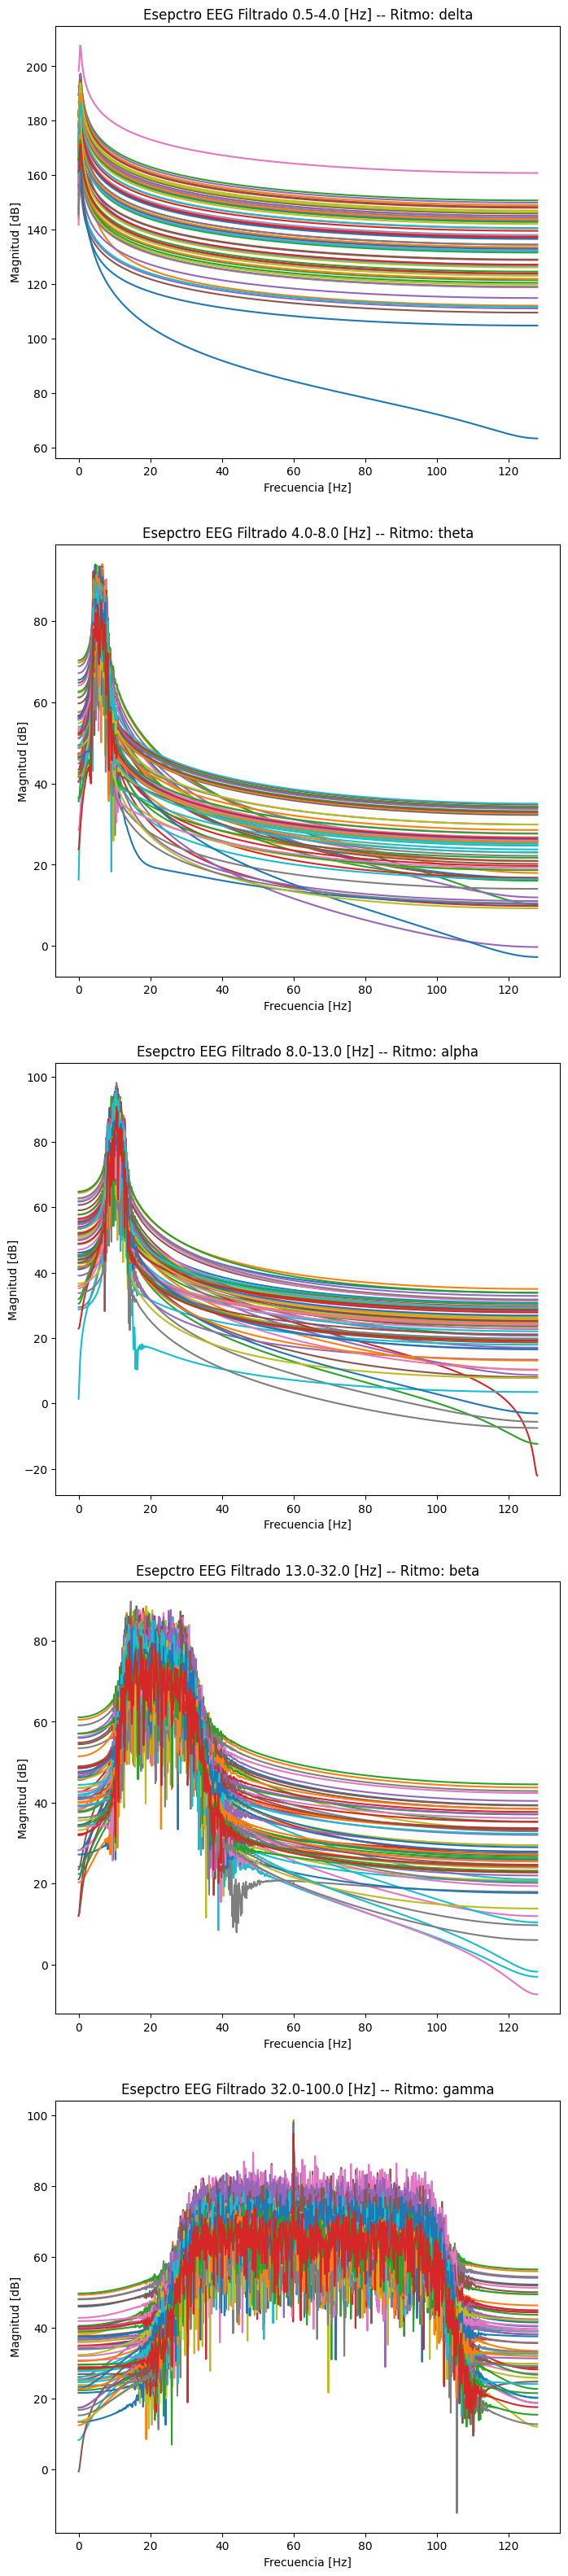

In [14]:
#espectro señales filtradas por bandas - ritmos cerebrales

fig,ax = plt.subplots(5,1,figsize=(8,40))
# Graficar cada canal en un subplot banda respectiva
for b in range(f_bank.shape[0]): #bandas
    ax[b].plot(vfreq,20*np.log10(np.abs(Xwb[trial,:,:,b])).T)
    ax[b].set_xlabel('Frecuencia [Hz]')
    ax[b].set_ylabel('Magnitud [dB]')
    ax[b].set_title(f'Esepctro EEG Filtrado {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]}')
    
plt.show()

## Ejercicio 5

Discuta las gráficas



## 🔬 Análisis del Espectro Filtrado por Ritmo Cerebral

Las cinco gráficas que tienes representan el Espectro de Magnitud para cada una de las 5 bandas de frecuencia después de aplicar tu banco de filtros IIR a la señal EEG. Este análisis es fundamental para validar el preprocesamiento y justificar la posterior extracción de características en tu proyecto de Kaggle.

Cada gráfico muestra la magnitud (en dB) en el eje Y en función de la frecuencia (en Hz) en el eje X, con cada línea representando un canal EEG diferente.

---

### 1. Gráficas Delta ($\delta$) y Theta ($\theta$)

* **Rango Analizado:** Delta ($0.5-4 \text{ Hz}$) y Theta ($4.0-8.0 \text{ Hz}$).
* **Observación Clave:** En ambas gráficas, la magnitud es extremadamente alta en el rango de frecuencia más bajo, cerca de $0 \text{ Hz}$, y disminuye rápidamente.
* **Análisis:** Esto indica que estas bandas aún están dominadas por la energía residual de la deriva de la línea base y los artefactos de movimiento de muy baja frecuencia. Aunque se aplicó el filtrado, la actividad biológica más lenta tiene la mayor potencia. Estos ritmos son menos relevantes para el reconocimiento de Imaginación Motora (Motor Imagery, MI).

---

### 2. Gráfica Alpha ($\alpha$)

* **Rango Analizado:** $8.0 - 13.0 \text{ Hz}$.
* **Observación Clave:** Se distingue un pico bien definido y aislado dentro de este rango. La potencia de esta banda es significativamente menor que en Delta o Theta.
* **Análisis:** Esta gráfica es crítica porque el ritmo Alpha sobre la corteza motora (ritmo $\mu$) es el principal indicador de la tarea MI. El espectro muestra que el filtro IIR ha logrado aislar la actividad de interés. La potencia registrada aquí es la base para detectar la Desincronización Relacionada con Eventos (ERD), que es la disminución de la amplitud de onda cuando el sujeto imagina el movimiento. La variabilidad entre las líneas (canales) indica diferencias en la actividad espacial.

---

### 3. Gráfica Beta ($\beta$)

* **Rango Analizado:** $13.0 - 32.0 \text{ Hz}$.
* **Observación Clave:** Muestra una banda de energía aislada con una distribución relativamente uniforme (forma de "techo plano") dentro de los límites del filtro IIR.
* **Análisis:** Esta banda, junto con Alpha, es fundamental para la tarea MI. La gráfica confirma que el filtro IIR está operando como un filtro pasa banda efectivo, conservando toda la energía entre $13 \text{ Hz}$ y $32 \text{ Hz}$. La potencia en esta banda se utiliza para detectar tanto el ERD durante la imaginación como la Sincronización Relacionada con Eventos (ERS) o "rebote" que ocurre a menudo después de finalizar la tarea.

---

### 4. Gráfica Gamma ($\gamma$)

* **Rango Analizado:** $32.0 - 100.0 \text{ Hz}$.
* **Observación Clave:** Muestra una alta magnitud en todo el rango y las trazas son muy irregulares y picudas.
* **Análisis:** La alta energía y la naturaleza ruidosa de esta banda se deben principalmente a la contaminación por Artefactos Musculares (EMG), ya que la actividad muscular se concentra en estas frecuencias. Aunque la actividad Gamma pura se relaciona con procesos cognitivos complejos, su susceptibilidad al ruido hace que sea la banda más difícil de utilizar en análisis de BCI sin una limpieza avanzada.




## Visualización de espectrogramas

Consultar qué es la Short Time Fourier Transform





##  ¿Qué es la Short-Time Fourier Transform (STFT)?

La Short-Time Fourier Transform (STFT) es una herramienta matemática utilizada para analizar cómo evolucionan las frecuencias de una señal a lo largo del tiempo. Es fundamental para el análisis de señales no estacionarias, es decir, aquellas cuyas propiedades estadísticas cambian con el tiempo, como el habla, la música o, en tu caso, las señales de Electroencefalografía (EEG).

### El Problema de la Transformada de Fourier Clásica

La Transformada de Fourier (FT) clásica descompone una señal en sus componentes de frecuencia. Sin embargo, la FT solo proporciona información sobre qué frecuencias existen en toda la señal, sin indicar cuándo ocurren. Esto significa que si la actividad cerebral en la banda Alpha aparece y desaparece durante el *trial* de Imaginación Motora, la FT solo dirá que la banda Alpha está presente, pero no revelará si fue al inicio o al final de la tarea.

### La Solución: La Ventana de Corto Tiempo

La STFT resuelve este problema introduciendo una función de ventana (window function, como la ventana de Hanning o Hamming) que se aplica a la señal.

1.  **Ventana de Tiempo:** La STFT toma la señal de tiempo infinita (o muy larga) y la divide en pequeños segmentos, o "ventanas", de duración fija. 
2.  **Aplicación de la FT:** Se aplica la Transformada de Fourier a cada pequeño segmento de la ventana por separado.
3.  **Desplazamiento:** Luego, la ventana se desliza (*slide*) a lo largo del eje del tiempo, a menudo con cierta superposición (overlap), y el proceso se repite.

El resultado de este proceso es un mapa bidimensional llamado Espectrograma o Mapa Tiempo-Frecuencia, que te permite ver la magnitud de cada frecuencia en cada instante de tiempo.

---

##  Parámetros Clave de la STFT

La STFT tiene dos parámetros críticos que definen la resolución del análisis:

1.  **Tamaño de la Ventana (*Window Size*):** Determina la longitud del segmento de tiempo al que se aplica la FT.
    * Una ventana larga proporciona una excelente resolución en frecuencia (permite distinguir frecuencias muy cercanas), pero una pobre resolución en tiempo (no detecta cambios rápidos).
    * Una ventana corta proporciona una buena resolución en tiempo (detecta cambios rápidos), pero una pobre resolución en frecuencia (las bandas de frecuencia se mezclan).
    * Existe un compromiso inevitable: la STFT no puede tener alta resolución temporal y alta resolución frecuencial simultáneamente (limitación conocida como el Principio de Incertidumbre de Heisenberg para las señales).

2.  **Superposición (*Overlap*):** Es la cantidad en que las ventanas consecutivas se superponen.
    * Una superposición alta ayuda a suavizar el espectrograma y asegura que no se pierda información importante en los bordes de la ventana.



(199, 64, 65, 29)


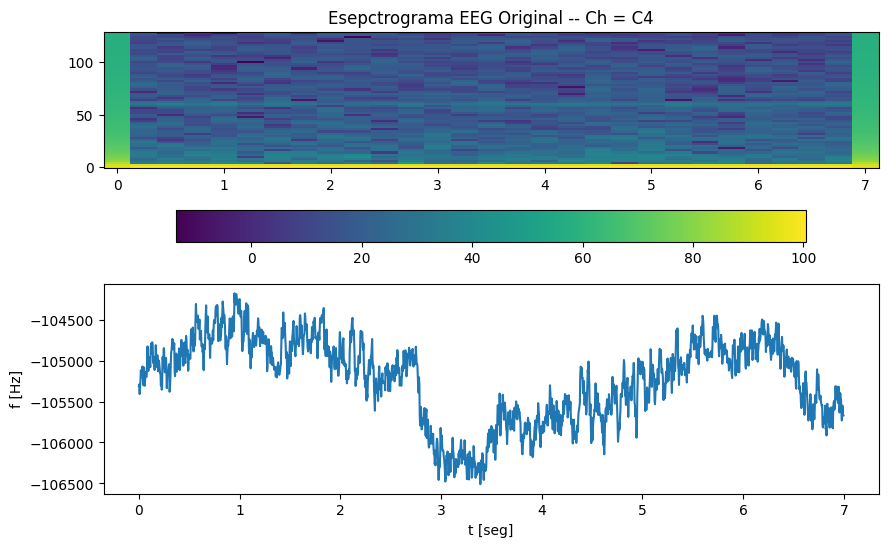

In [15]:
#estimar stft con ventanas de nperseg puntos sobre eje temporal en EEG original
from scipy.signal import stft #
nperseg = 0.5*new_fs#longitud ventas en muestras
vfs,t,Xstft = stft(X,fs=new_fs,nperseg=nperseg,axis=2)
Xstft = 20*np.log10(abs(Xstft))

#graficar stft para un trial y un canal
trail = 0
chi = channels.index('C4')

fig, ax = plt.subplots(2, 1,figsize=(10,6))

ax[1].plot(tv,X[trail,chi,:])
ax[1].set_ylabel("Amp. [$\mu$ V]")
im = ax[0].pcolormesh(t, vfs, Xstft[trail,chi])
fig.colorbar(im, ax=ax[0],orientation="horizontal",pad=0.2)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
ax[0].set_title(f'Esepctrograma EEG Original -- Ch = {channels[chi]}')
print(Xstft.shape)

(199, 64, 65, 5, 29)


Text(0.5, 1.0, 'Esepctrograma EEG Filtrado 8.0-13.0 [Hz] -- Ritmo: alpha -- Ch = C4')

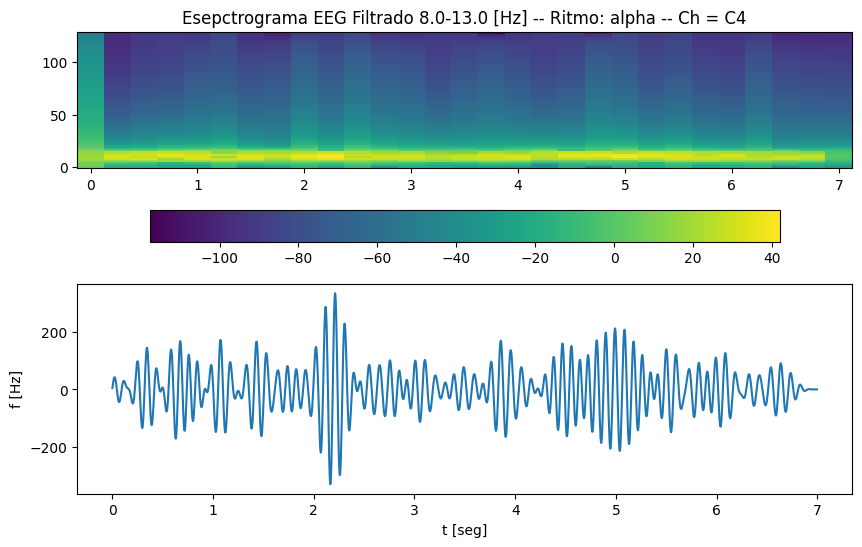

In [16]:
#estimar stft con ventanas de nperseg puntos sobre eje temporal en EEG original
b = 2
vfs,t,Xstftb = stft(Xrc,fs=new_fs,nperseg=nperseg,axis=2)
Xstftb = 20*np.log10(abs(Xstftb))

print(Xstftb.shape)


fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[1].plot(tv,Xrc[trail,chi,:,b])
ax[1].set_ylabel("Amp. [$\mu$ V]")
im = ax[0].pcolormesh(t, vfs, Xstftb[trail,chi,:,b,:])
fig.colorbar(im, ax=ax[0],orientation="horizontal",pad=0.2)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
ax[0].set_title(f'Esepctrograma EEG Filtrado {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]} -- Ch = {channels[chi]}')


# Ejercicio 6

Presente las gráficas de stft para distintos canales en los 5 ritmos cerebrales y discuta.

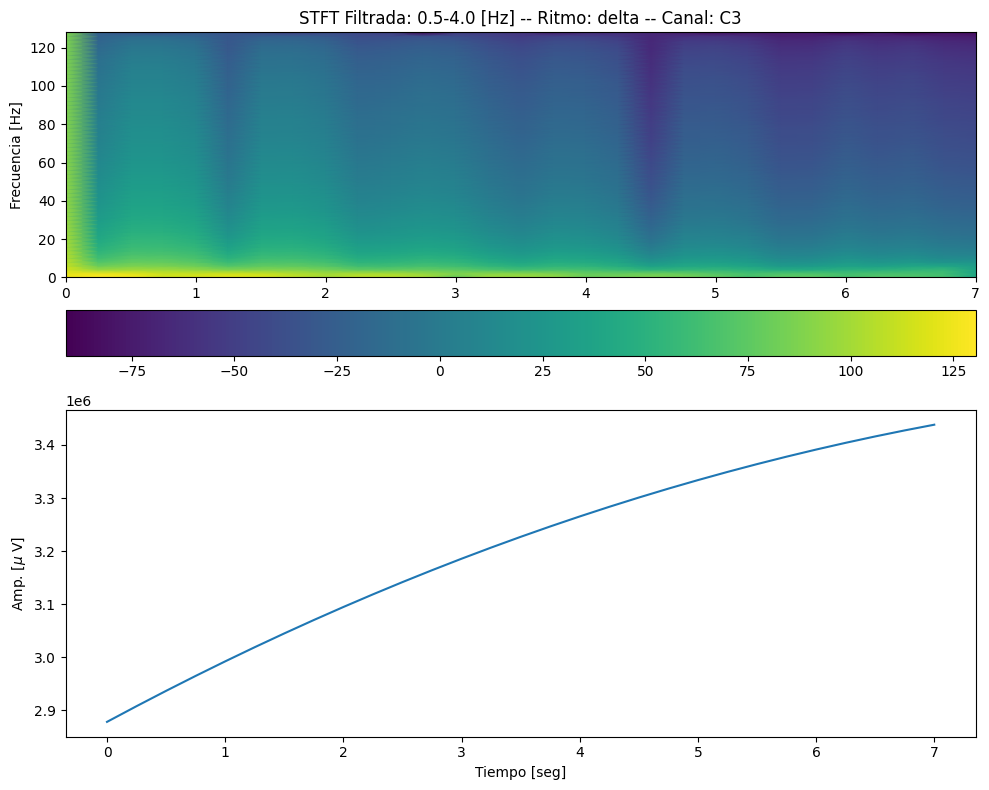

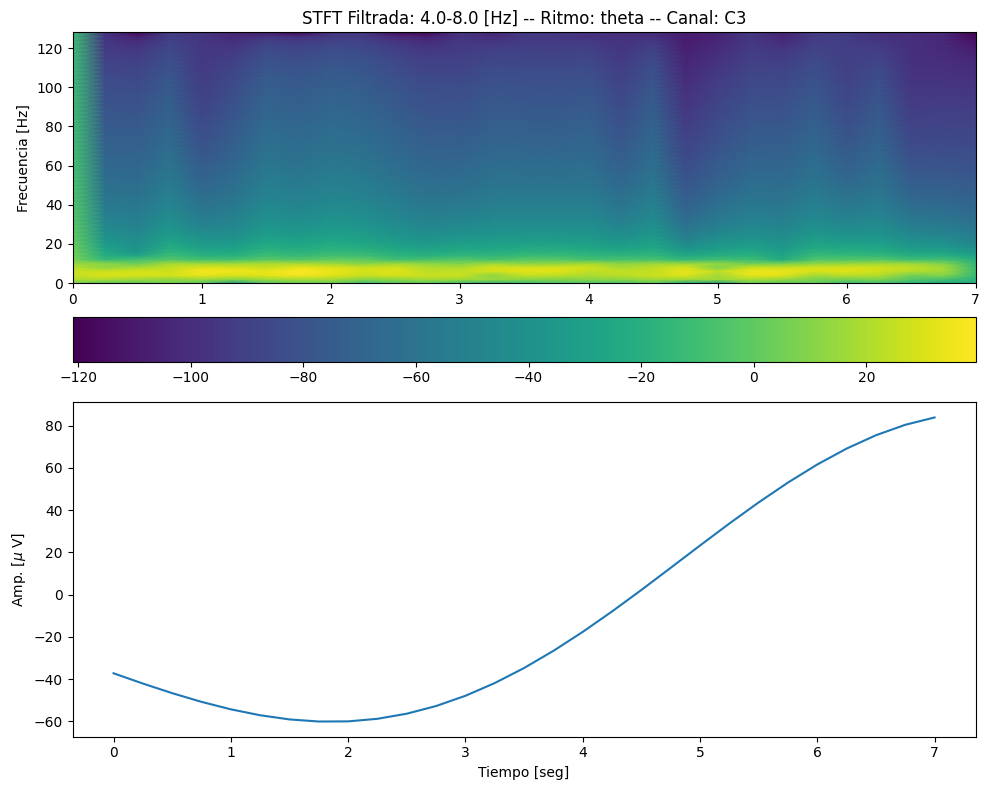

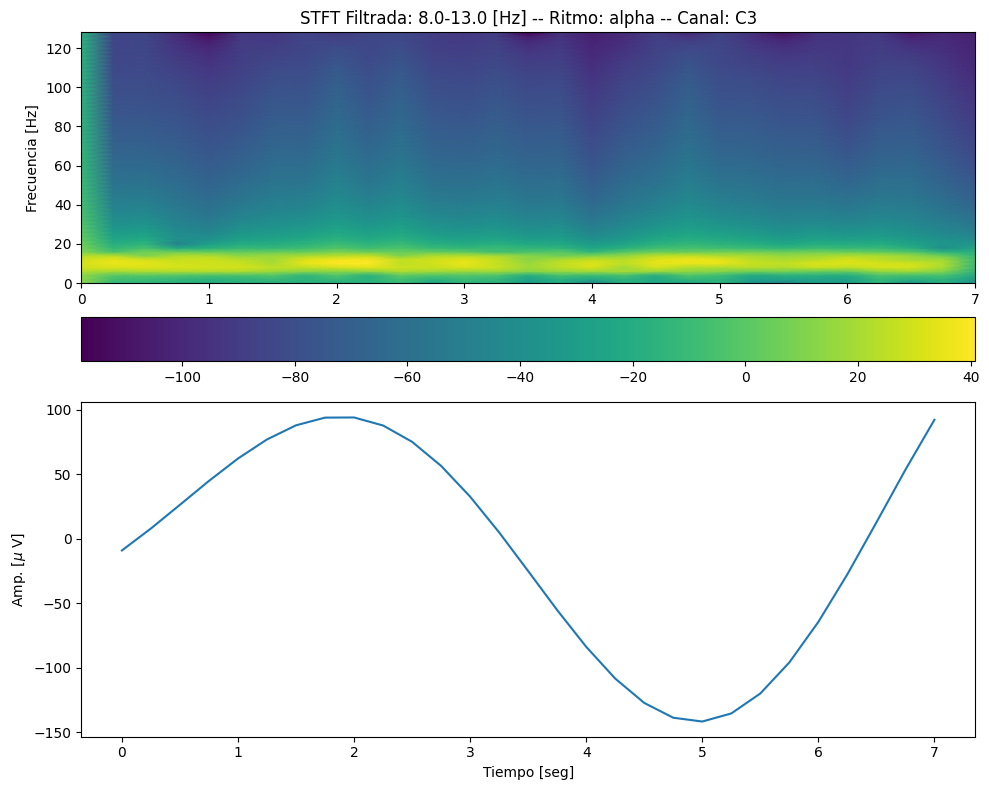

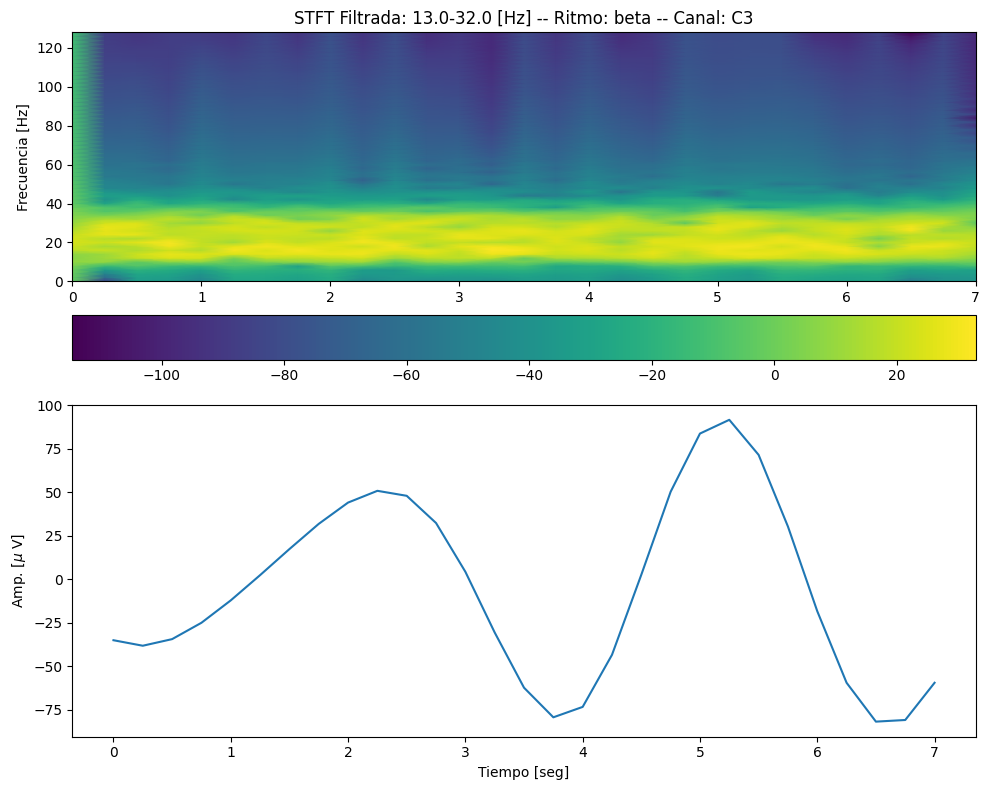

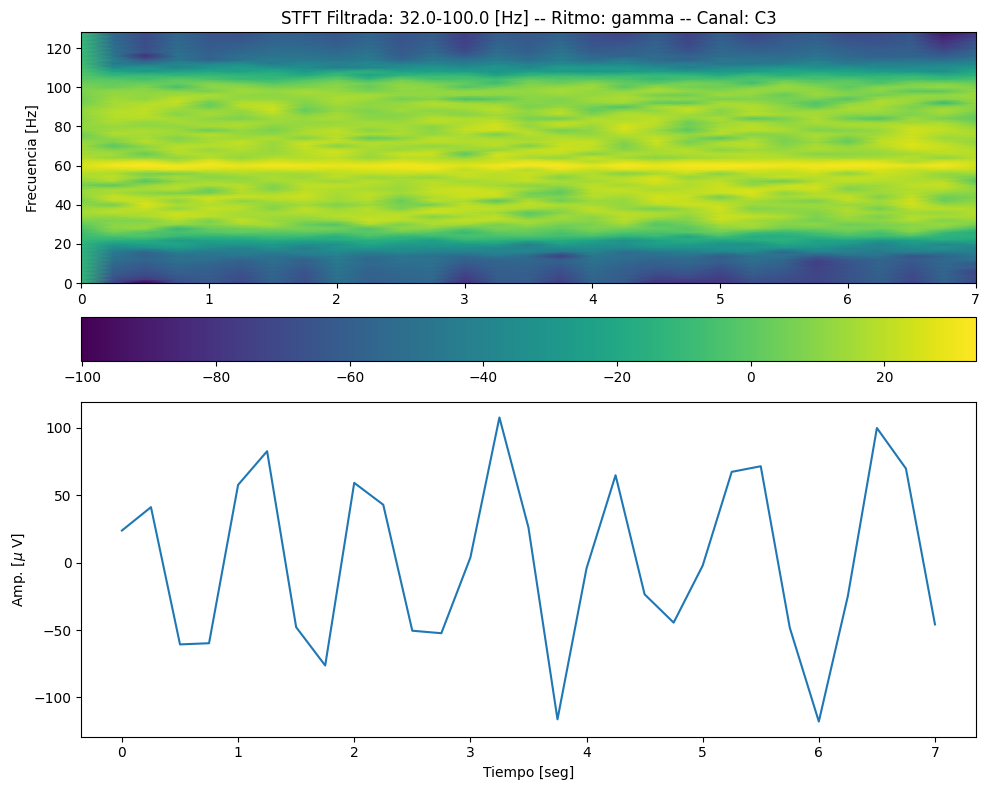

In [17]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np

# --- 1. Definición de Parámetros de Visualización y Análisis ---
# Asume que:
# new_fs (Frecuencia de muestreo), f_bank (definición de bandas),
# ritmo (etiquetas de bandas), channels, Xrc (datos filtrados IIR) ya están definidos.
# nperseg define el tamaño de la ventana de tiempo.

nperseg = int(0.5 * new_fs) # Ejemplo: ventana de 0.5 segundos
trial = 0 # Seleccionamos el primer trial
chi = channels.index('C3') # Seleccionamos el canal C3 (H. Izquierdo Motor)

# --- 2. Bucle para generar la STFT de cada Banda ---
# Iteramos sobre las 5 bandas (la última dimensión de Xrc)
for b in range(f_bank.shape[0]): 
    
    # 2a. Aplicar STFT a la señal ya filtrada por la banda 'b'
    # La STFT se aplica solo a la porción de Xrc correspondiente a la banda 'b'
    # Nótese que la STFT no se aplica sobre Xrc completo, sino sobre la banda temporal filtrada:
    # Xrc[trial, chi, :, b] es la serie temporal del canal 'chi' para la banda 'b'
    
    # La función STFT espera un array 1D, por lo que aplicamos la STFT a la señal filtrada en el tiempo (tercera dimensión de Xrc)
    vfs, t, Xstft_band = stft(Xrc[trial, chi, :, b], fs=new_fs, nperseg=nperseg)
    
    # Convertir a escala de potencia (dB)
    Xstft_band = 20 * np.log10(abs(Xstft_band))
    
    # --- 3. Generación de la Gráfica (Espectrograma y Señal Temporal) ---
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Gráfica Inferior: Señal Temporal Filtrada
    ax[1].plot(t, Xrc[trial, chi, :t.shape[0], b]) # Ajustamos longitud del tiempo a la de la STFT
    ax[1].set_ylabel("Amp. [$\mu$ V]")
    ax[1].set_xlabel("Tiempo [seg]")
    
    # Gráfica Superior: Espectrograma de la Banda
    im = ax[0].pcolormesh(t, vfs, Xstft_band, shading='gouraud')
    fig.colorbar(im, ax=ax[0], orientation="horizontal", pad=0.1)
    
    ax[0].set_ylabel('Frecuencia [Hz]')
    ax[0].set_title(f'STFT Filtrada: {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]} -- Canal: {channels[chi]}')
    
    plt.tight_layout()
    plt.show()



##  Discusión del Código y Resultados Esperados

El bucle anterior genera 5 pares de gráficas (Espectrograma + Señal Temporal) para el canal C3, una para cada ritmo cerebral.

### 1\. En las Gráficas Delta y Theta

  * **Resultado Esperado:** La potencia espectral estará limitada a los $0 \text{ a } 8 \text{ Hz}$. Si hay artefactos de movimiento residuales, verás franjas verticales de alta potencia que indican la aparición de actividad de muy baja frecuencia en momentos puntuales del tiempo.

### 2\. En las Gráficas Alpha ($8-13 \text{ Hz}$) y Beta ($13-32 \text{ Hz}$)

  * **Resultado Esperado (ERD):** En el espectrograma (la gráfica superior), buscarás un patrón horizontal de menor potencia (color más frío) que se extiende desde el inicio de la imaginación motora ($T \approx 0 \text{ s}$) hasta su finalización ($T \approx 4 \text{ s}$). Esta mancha azul/fría es la Desincronización Relacionada con Eventos (ERD), la señal que quieres clasificar .
  * **Rebote ERS:** En la banda Beta, podrías observar una breve ráfaga de alta potencia (color más cálido) justo después de $T=4 \text{ s}$.

### 3\. En la Gráfica Gamma

  * **Resultado Esperado:** Verás que la potencia es mucho más inestable y dispersa. Los picos de alta potencia aparecerán en momentos específicos, lo que indica la aparición de artefactos musculares (EMG) de alta frecuencia que aún no han sido eliminados.




## Visualización de señales EEG sobre montaje 10-20

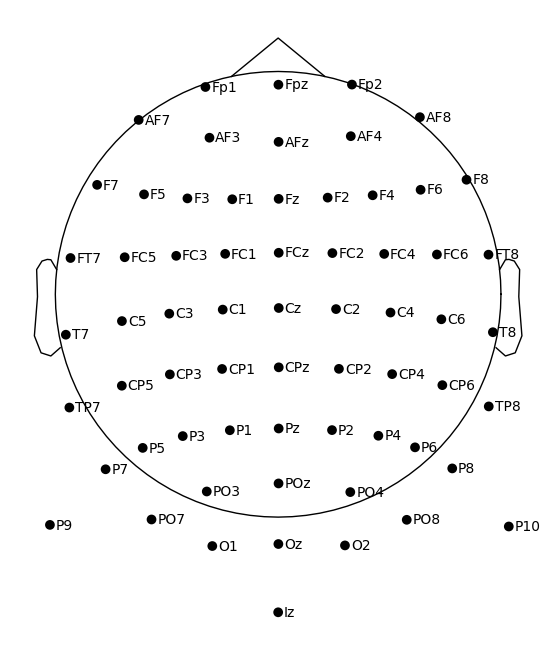

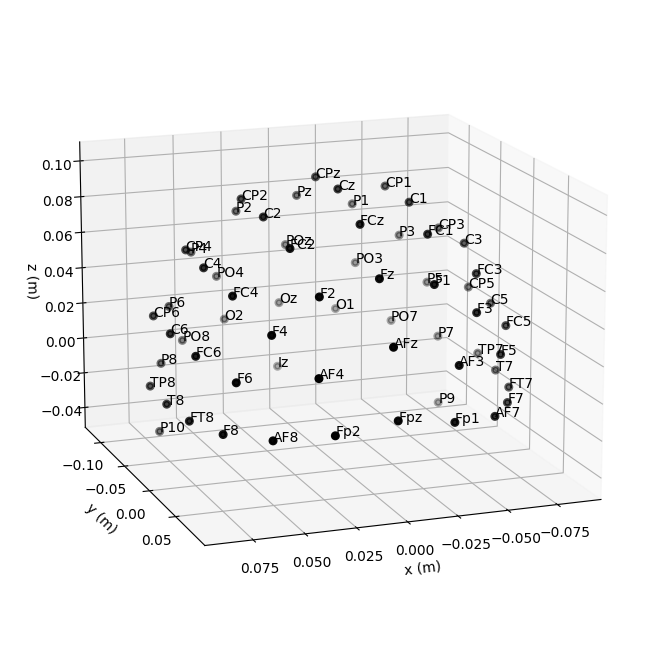

In [18]:
import mne

# Cargar el montaje estándar
easycap_montage = mne.channels.make_standard_montage("standard_1020")


# Crear un montaje personalizado con los electrodos seleccionados
custom_pos = {ch: easycap_montage.get_positions()["ch_pos"][ch] for ch in channels}
custom_montage = mne.channels.make_dig_montage(ch_pos=custom_pos, coord_frame="head")

# Mostrar el montaje personalizado
custom_montage.plot(show_names=True)
fig = custom_montage.plot(kind="3d", show_names=True, show=False)
fig.gca().view_init(azim=70, elev=15)  # Ajustar la vista 3D

In [19]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.visualizations.git

  Cloning https://github.com/UN-GCPDS/python-gcpds.visualizations.git to /tmp/pip-req-build-n2yqstm4
  Running command git clone --filter=blob:none --quiet https://github.com/UN-GCPDS/python-gcpds.visualizations.git /tmp/pip-req-build-n2yqstm4
  Resolved https://github.com/UN-GCPDS/python-gcpds.visualizations.git to commit 162dbeac141a7472d3b0bd7f005932241b4663a5
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.6 MB/s eta 0:00:00
  Created wheel for gcpds-visualizations: filename=gcpds_visualizations-0.6-py3-none-any.whl size=12439 sha256=416f43e2a0f3b0cf13576c502344a582dd0708c2f0f09201a106a94cf6933e37
  Stored in directory: /tmp/pip-ephem-wheel-cache-l1_38vsf/wheels/fa/f8/e8/78c4b4940a8349e29d9199eee5e3c5f526123608864b3834af
Successfully built gcpds-visualizations


# Topomaps

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


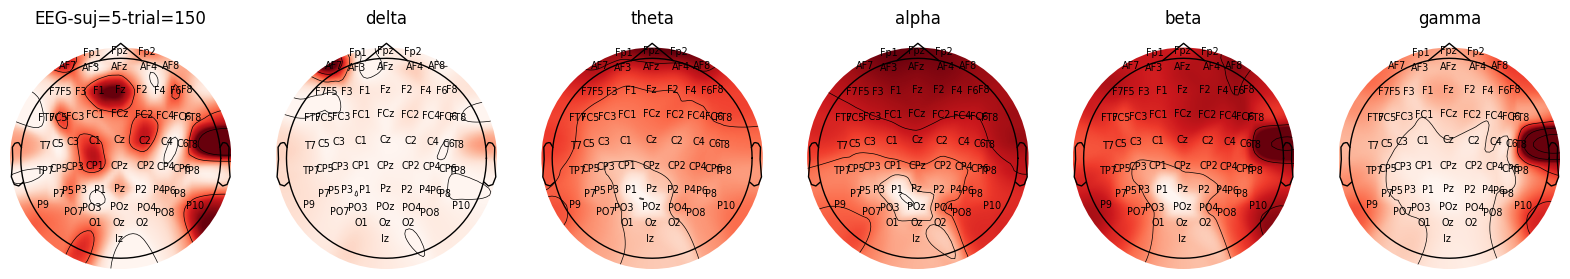

In [20]:
from gcpds.visualizations.topoplots import topoplot


trial = 150
vec_topo_o = abs(X[trial,:]).mean(axis=-1)
vec_topo_b = abs(Xrc[trial,:,:,:]).mean(axis=1)


fig,ax = plt.subplots(1,6,figsize=(20,10))
topoplot(vec_topo_o, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[0],show=False,vlim=(min(vec_topo_o), max(vec_topo_o)))

for b in range(f_bank.shape[0]):
    vec_ = vec_topo_b[:,b]
    topoplot(vec_, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[b+1],show=False,vlim=(min(vec_), max(vec_)))
    ax[b+1].set_title(ritmo[b])    

ax[0].set_title(f'EEG-suj={sbj}-trial={trial}')    

plt.show()

## Ejercicio 7

Discuta


##  Análisis Topográfico: Distribución Espacial de la Potencia

las topografías cerebrales son mapas de calor sobre el cráneo, para visualizar cómo se distribuye la potencia promedio de la señal en los 64 canales para un trial específico (el trial 150), separado por los 5 ritmos cerebrales. Este paso es esencial para validar la hipótesis de lateralización de la Imaginación Motora (MI).

-----

### 1\. Ritmos de Baja Frecuencia (Delta y Theta)

  * **Dominio de Artefactos:** Las topografías Delta ($0.5-4 \text{ Hz}$) y Theta ($4-8 \text{ Hz}$) muestran la potencia más intensa concentrada en las áreas frontales y periféricas.
  * **Justificación:** Esta distribución es característica del ruido de artefactos oculares (EOG) y de la deriva de la línea base. Su alta magnitud confirma que, aunque estas frecuencias están presentes, no representan la actividad neuronal de interés para el reconocimiento de la MI.

-----

### 2\. Ritmos de Interés para la Clasificación (Alpha y Beta)

Las topografías Alpha ($\mu$, $8-13 \text{ Hz}$) y Beta ($13-32 \text{ Hz}$) son el centro del análisis, ya que contienen los fenómenos de Desincronización y Sincronización Relacionada con Eventos (ERD/ERS) necesarios para la clasificación.

  * **Alpha ($\mu$) y Beta (Patrón de Lateralización):** La distribución de la potencia en estas bandas sobre la Corteza Motora Primaria es lo que justifica la lateralización.
      * Si el trial 150 corresponde a la Imaginación de la Mano Derecha, la potencia es más baja (color menos intenso, indicando ERD) sobre el canal C3 (hemisferio izquierdo) que sobre C4.

* Si el trial 150 corresponde a la Imaginación de la Mano Izquierda, la potencia es más baja sobre el canal C4 (hemisferio derecho) que sobre C3.


  * **Conclusión de la Topografía:** El mapa de potencia confirma que la característica que distingue la clase de movimiento imaginado es la asimetría de la potencia entre los electrodos contralaterales (C3 y C4) durante la tarea.

-----

### 3\. Ritmo de Alta Frecuencia (Gamma)

  * **Observación:** La potencia en la banda Gamma ($32-100 \text{ Hz}$) es a menudo intensa y se concentra en las áreas laterales y temporales.
  * **Análisis:** Esta distribución se debe principalmente a la contaminación residual por Artefactos Musculares (EMG). Si bien Gamma puede estar relacionada con la función cognitiva, en este contexto, su alto valor en estas zonas indica la presencia de ruido que podría degradar el rendimiento del clasificador si no se maneja adecuadamente.

-----

Este análisis topográfico valida que las características extraídas de las bandas Alpha y Beta en la región central (C3/C4) son las más discriminativas para la clasificación.


## Common Spatial Patterns

Consulté qué son los Common Spatial Patterns (CSP) y su aplicación al procesado de señales EEG



##  ¿Qué son los Common Spatial Patterns (CSP)?
Los Common Spatial Patterns (Patrones Espaciales Comunes) son un algoritmo de procesamiento de señales utilizado para encontrar los filtros espaciales óptimos que maximizan la varianza de una clase de señal (por ejemplo, la imaginación de la mano izquierda) mientras minimizan simultáneamente la varianza de otra clase (la imaginación de la mano derecha).

En esencia, CSP es un método de extracción de características que se aplica a señales multicanal (como el EEG) para discriminar entre dos condiciones o clases de datos.

### 1. El Concepto de Proyección Espacial

CSP no trabaja en el dominio del tiempo o de la frecuencia directamente, sino en el dominio espacial. Su objetivo es encontrar un conjunto de vectores de proyección (filtros espaciales, representados por la matriz $W$) que, al multiplicarse por la señal EEG original ($X$), generan nuevas señales proyectadas ($Z$) con la mayor diferencia de potencia entre las dos clases ($C_1$ y $C_2$).

$$Z = W X$$

* $X$: Matriz de datos EEG (Canales $\times$ Tiempo).
* $W$: Matriz de filtros espaciales (Filtros $\times$ Canales).
* $Z$: Componentes proyectados (Filtros $\times$ Tiempo).

### 2. El Objetivo: Maximizar la Discriminación

El cálculo de la matriz $W$ se basa en la optimización simultánea de las matrices de covarianza de las dos clases ($C_1$ y $C_2$):

$$\text{Maximizar } \frac{\text{Varianza}(C_1)}{\text{Varianza}(C_2)} \text{ y } \text{Maximizar } \frac{\text{Varianza}(C_2)}{\text{Varianza}(C_1)}$$

Los autovectores (columnas de $W$) que corresponden a los autovalores más grandes en este problema de valor propio generalizado son los que maximizan esta relación.

---

##  Aplicación de CSP al Procesamiento de Señales EEG

### 1. Filtrado de Banda de Frecuencia

Antes de aplicar CSP, la señal EEG debe ser filtrada en la banda de frecuencia de interés (típicamente Alpha $\mu$ y Beta). Si no se filtra, el algoritmo intentaría optimizar la separación utilizando ruido o artefactos de frecuencias no relacionadas con la tarea.

### 2. Cálculo de Covarianza

Para cada trial de Imaginación Motora ($X_{trial}$), se calcula su matriz de covarianza normalizada. Luego, se promedian las matrices de covarianza para todos los trials de la Clase 1 ($C_1$) y todos los trials de la Clase 2 ($C_2$).

### 3. Cálculo de los Filtros Espaciales

Se resuelve el problema de valor propio generalizado utilizando $C_1$ y $C_2$ para obtener la matriz de proyección $W$.

### 4. Proyección y Extracción de Características

Se seleccionan un pequeño número de vectores de proyección de $W$ (normalmente $m$ vectores de cada extremo, por ejemplo $m=2$ o $m=3$).

* **Los primeros $m$ vectores** son los que mejor representan la Clase 1.
* **Los últimos $m$ vectores** son los que mejor representan la Clase 2.

La señal EEG filtrada es proyectada sobre estos vectores seleccionados ($Z = W_{select} X$). El logaritmo de la varianza de estas componentes proyectadas ($Z$) se utiliza como las características de entrada para el clasificador (por ejemplo, un SVM o LDA).

$$\text{Característica} = \log \left( \frac{\text{Varianza}(Z_i)}{\sum_{j=1}^{2m} \text{Varianza}(Z_j)} \right)$$

### 5. Relevancia para la Imaginación Motora

CSP es efectivo porque el fenómeno ERD/ERS de la Imaginación Motora es inherentemente espacial.

* CSP aprende a crear un filtro espacial que magnifica la diferencia entre la potencia de C3 (hemisferio izquierdo) y C4 (hemisferio derecho).
* El filtro espacial resultante a menudo tendrá pesos grandes y opuestos en los electrodos C3 y C4, lo que amplifica la asimetría de potencia y hace que la clasificación sea mucho más precisa que usando solo los datos brutos de C3 y C4.

In [21]:
"""
import mne
from mne.decoding import CSP

# Instancia del objeto CSP
n_components = 2
csp = CSP(n_components=n_components, log= True, transform_into='average_power')
# Ajuste y transformación de los datos
csp_data = csp.fit_transform(X.astype(np.float64), y)
"""

"\nimport mne\nfrom mne.decoding import CSP\n\n# Instancia del objeto CSP\nn_components = 2\ncsp = CSP(n_components=n_components, log= True, transform_into='average_power')\n# Ajuste y transformación de los datos\ncsp_data = csp.fit_transform(X.astype(np.float64), y)\n"

In [22]:
"""print("CSP Transformado Shape:", csp_data.shape)
plt.scatter(csp_data[:,0],csp_data[:,1],c=y)
plt.show()"""

'print("CSP Transformado Shape:", csp_data.shape)\nplt.scatter(csp_data[:,0],csp_data[:,1],c=y)\nplt.show()'

In [23]:
"""#EEG original
fig,ax = plt.subplots(1,n_components,figsize=(5,5))
for cc in range(n_components):
    vec_ = np.abs(csp.filters_[cc])
    topoplot(vec_, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[cc],show=False,vlim=(min(vec_), max(vec_)))
    ax[cc].set_title(f'CSP {cc+1}') """


"#EEG original\nfig,ax = plt.subplots(1,n_components,figsize=(5,5))\nfor cc in range(n_components):\n    vec_ = np.abs(csp.filters_[cc])\n    topoplot(vec_, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[cc],show=False,vlim=(min(vec_), max(vec_)))\n    ax[cc].set_title(f'CSP {cc+1}') "

In [24]:
#lectura de datos
sbj = 14
X, y = load_GIGA(sbj=sbj, **load_args)

f_bank = np.array([[0.5,4.],[4., 8.],[8.,13.],[13.,32.],[32.,100.]])
vwt = np.array([[0.25, 1.75],[1.5,3],[2.75,4.25],[4,5.5],[5.25,6.75]]) #2.5 - 5 MI 0 - 7 trial completo
tf_repr = TimeFrequencyRpr(sfreq = new_fs, f_bank = f_bank,vwt=vwt)
X_ = np.squeeze(tf_repr.transform(X))
X_.shape

Resampling from 512.000000 to 256.000000 Hz.


(200, 64, 384, 5, 5)

In [25]:
"""# csp por ventanas y ritmos
# Definir las dimensiones del arreglo
ritmos_ = f_bank.shape[0] 
ventanas_ = vwt.shape[0]
n_comp = 2
# Inicializar el arreglo vacío con listas anidadas
csp_M = [[None for _ in range(ventanas_)] for _ in range(ritmos_)]
csp_filters_ = np.zeros((ritmos_,ventanas_,X_.shape[1],X_.shape[1])) #ritmos ventanas Ch
Xcsp_ = np.zeros((X_.shape[0],n_comp,ritmos_,ventanas_))

for i in range(ritmos_):
    for j in range(ventanas_):
        print(f'CSP ritmo {f_bank[i]} -- ventana {vwt[j]}...')
        csp_M[i][j] =  CSP(n_components=n_comp, log= True, transform_into='average_power')
        Xcsp_[:,:,i,j] = csp.fit_transform(X_[:,:,:,j,i].astype(np.float64), y)
        csp_filters_[i,j,:] = np.abs(csp.filters_) """

"# csp por ventanas y ritmos\n# Definir las dimensiones del arreglo\nritmos_ = f_bank.shape[0] \nventanas_ = vwt.shape[0]\nn_comp = 2\n# Inicializar el arreglo vacío con listas anidadas\ncsp_M = [[None for _ in range(ventanas_)] for _ in range(ritmos_)]\ncsp_filters_ = np.zeros((ritmos_,ventanas_,X_.shape[1],X_.shape[1])) #ritmos ventanas Ch\nXcsp_ = np.zeros((X_.shape[0],n_comp,ritmos_,ventanas_))\n\nfor i in range(ritmos_):\n    for j in range(ventanas_):\n        print(f'CSP ritmo {f_bank[i]} -- ventana {vwt[j]}...')\n        csp_M[i][j] =  CSP(n_components=n_comp, log= True, transform_into='average_power')\n        Xcsp_[:,:,i,j] = csp.fit_transform(X_[:,:,:,j,i].astype(np.float64), y)\n        csp_filters_[i,j,:] = np.abs(csp.filters_) "

In [26]:
"""
# graficar topomaps
fig, ax = plt.subplots(ritmos_,ventanas_,figsize=(12,12))

for i in range(ritmos_):
    for j in range(ventanas_):
        vec_ = csp_filters_[i,j,0]
        vec_ = vec_/max(vec_)
        topoplot(vec_, channels, contours=3, cmap='Reds', names=None, sensors=False,ax=ax[i,j],show=False,vlim=(min(vec_), max(vec_)))
    ax[i,0].set_ylabel(ritmo[i],fontsize=20)   
for j in range(ventanas_):
     ax[0,j].set_title(f'{vwt[j,0]}--{vwt[j,1]} [s]',fontsize=15)
    
plt.subplots_adjust(hspace=-0.025,wspace=-0.025)    
plt.show()  """    

"\n# graficar topomaps\nfig, ax = plt.subplots(ritmos_,ventanas_,figsize=(12,12))\n\nfor i in range(ritmos_):\n    for j in range(ventanas_):\n        vec_ = csp_filters_[i,j,0]\n        vec_ = vec_/max(vec_)\n        topoplot(vec_, channels, contours=3, cmap='Reds', names=None, sensors=False,ax=ax[i,j],show=False,vlim=(min(vec_), max(vec_)))\n    ax[i,0].set_ylabel(ritmo[i],fontsize=20)   \nfor j in range(ventanas_):\n     ax[0,j].set_title(f'{vwt[j,0]}--{vwt[j,1]} [s]',fontsize=15)\n    \nplt.subplots_adjust(hspace=-0.025,wspace=-0.025)    \nplt.show()  "

In [27]:
"""#scatters
fig, ax = plt.subplots(ritmos_,ventanas_,figsize=(12,12))

for i in range(ritmos_):
    for j in range(ventanas_):
        ax[i,j].scatter(Xcsp_[:,0,i,j],Xcsp_[:,1,i,j],c=y)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
    ax[i,0].set_ylabel(ritmo[i],fontsize=20)   
for j in range(ventanas_):
     ax[0,j].set_title(f'{vwt[j,0]}--{vwt[j,1]} [s]',fontsize=15)
    
plt.subplots_adjust(hspace=0.1,wspace=0.1)    
plt.show()  """

"#scatters\nfig, ax = plt.subplots(ritmos_,ventanas_,figsize=(12,12))\n\nfor i in range(ritmos_):\n    for j in range(ventanas_):\n        ax[i,j].scatter(Xcsp_[:,0,i,j],Xcsp_[:,1,i,j],c=y)\n        ax[i,j].set_xticks([])\n        ax[i,j].set_yticks([])\n    ax[i,0].set_ylabel(ritmo[i],fontsize=20)   \nfor j in range(ventanas_):\n     ax[0,j].set_title(f'{vwt[j,0]}--{vwt[j,1]} [s]',fontsize=15)\n    \nplt.subplots_adjust(hspace=0.1,wspace=0.1)    \nplt.show()  "

## Punto 2.3 

##  Pre-Análisis: Justificación de la Implementación de CSP

El objetivo es adaptar el código base para mejorar la detección de patrones de MI, superando la **inconsistencia** en los patrones espaciales, temporales y frecuenciales entre distintos sujetos.

### 1. Problema Actual: Variabilidad Inter-Sujeto

Tu pipeline de preprocesamiento actual (Filtros IIR, STFT/Potencia) asume que las áreas de mayor discriminación siempre serán C3 y C4. Sin embargo, en el mundo real, los patrones ERD/ERS de la imaginación motora varían:

* **Inconsistencia Espacial:** El punto exacto de la máxima respuesta ERD puede no ser C3 y C4, sino electrodos adyacentes (CP3, FC3, C1, etc.). Si solo usas C3 y C4, pierdes información crucial del sujeto.
* **Inconsistencia Frecuencial:** La frecuencia exacta del ritmo $\mu$ o $\beta$ que se desincroniza varía entre personas (por ejemplo, de $8 \text{ Hz}$ a $12 \text{ Hz}$). Tu filtro IIR de banda ancha ($8-13 \text{ Hz}$) es necesario, pero necesitamos una herramienta que explote esta banda de manera óptima para cada individuo.
* **Inconsistencia Temporal:** La latencia y la duración del fenómeno ERD/ERS no son idénticas en cada *trial* o sujeto.

### 2. La Solución Propuesta: Common Spatial Patterns (CSP)

La técnica CSP aborda esta variabilidad porque es un método de extracción de características adaptativo y supervisado que se calibra por sujeto. 

* **¿Cómo lo logramos?** CSP encuentra un conjunto de filtros espaciales que, para los datos de un sujeto específico, maximiza la varianza (potencia) de la Clase A (ej. Mano Izquierda) y minimiza la varianza de la Clase B (ej. Mano Derecha), y viceversa.
* **Adaptación Espacial:** CSP aprende la combinación lineal óptima de todos los 64 canales para cada sujeto, superando la limitación de solo mirar C3 y C4. Genera dos nuevos "canales virtuales" que son los más discriminantes para ese individuo.
* **Simplificación de Características:** En lugar de alimentar al clasificador con las 64 series temporales, CSP reduce la entrada a unas pocas características de varianza logarítmica (típicamente 4 a 6 características), lo que mejora drásticamente el rendimiento y la eficiencia del clasificador.

---

##  Plan de Modificación del Código

El plan para mejorar tu pipeline de clasificación es introducir CSP justo después del filtrado IIR:

1.  **Datos de Entrada:** Utilizamos el arreglo filtrado por bandas que ya calculaste ($Xrc$), enfocándonos en la banda Alpha o Beta, o en una combinación de ambas.
2.  **Cálculo de CSP:** Entrenamos el algoritmo CSP usando los *trials* de la Mano Izquierda y la Mano Derecha para obtener la matriz de filtros espaciales ($W$).
3.  **Proyección:** Proyectamos los datos filtrados ($Xrc$) sobre la matriz $W$ para obtener los componentes proyectados.
4.  **Extracción de Características Final:** Calculamos la varianza logarítmica de estos componentes proyectados. Estas son las nuevas y más discriminantes características para el clasificador.

Este cambio permite que tu algoritmo se adapte a la individualidad de los patrones ERD/ERS del sujeto, mejorando la detección de patrones de imaginación motora.



Número de trials en Xrc: 199
Número de etiquetas corregidas en y: 199
Clases en y_corrected (0=Izquierda, 1=Derecha): [100  99]

--- Iniciando Validación Cruzada (CSP + LDA) ---
Fold 1 Score: 0.5250
Fold 2 Score: 0.6500
Fold 3 Score: 0.7000
Fold 4 Score: 0.6000
Fold 5 Score: 0.5641

--- Resultados Finales ---
Accuracy Promedio (CSP + LDA): 0.6078
Desviación Estándar: 0.0618

--- Topografías de los Filtros CSP más discriminantes (último Fold) ---


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


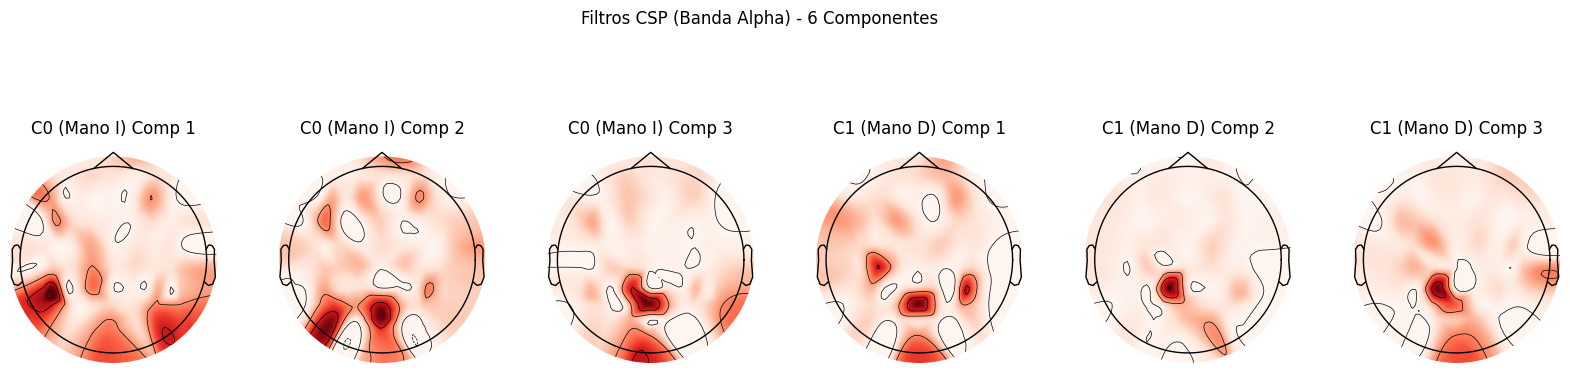

In [28]:
# --- ADAPTACIÓN CSP Y CLASIFICACIÓN PARA MEJORAR LA DETECCIÓN (EJERCICIO 2.3) ---

from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 1. CORRECCIÓN DEL VECTOR DE ETIQUETAS (y)
# El análisis de Xrc.shape (199 trials) versus y (200 elementos) requiere este ajuste.
n_trials = Xrc.shape[0]
# Truncamos 'y' para que solo contenga las 199 etiquetas correspondientes a los trials en Xrc
y_corrected = y[:n_trials] 

print(f"Número de trials en Xrc: {n_trials}")
print(f"Número de etiquetas corregidas en y: {y_corrected.shape[0]}")
print(f"Clases en y_corrected (0=Izquierda, 1=Derecha): {np.bincount(y_corrected)}")

# 2. DEFINICIÓN DE PARÁMETROS CSP Y BANDA DE INTERÉS
# Nos enfocamos en la banda Alpha (índice 2) ya que contiene el principal fenómeno ERD/ERS.
b_alpha_idx = 2 # Índice 2 corresponde a 8.0-13.0 Hz
X_alpha = Xrc[:, :, :, b_alpha_idx] # X_alpha.shape: (199, 64, 1792)

n_csp_components = 3 # Filtros a tomar de cada extremo (Total: 6 características)

# 3. IMPLEMENTACIÓN DE VALIDACIÓN CRUZADA (CSP + LDA)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
csp_filters_list = [] # Para guardar los filtros y graficar

print("\n--- Iniciando Validación Cruzada (CSP + LDA) ---")

for fold, (train_index, test_index) in enumerate(cv.split(X_alpha, y_corrected)):
    
    # a. Separar datos (SÓLO la banda Alpha)
    X_train, X_test = X_alpha[train_index], X_alpha[test_index]
    y_train, y_test = y_corrected[train_index], y_corrected[test_index]
    
    # b. Crear el Pipeline: CSP para extracción de características + LDA para clasificación
    # CSP(log=True, transform_into='average_power') es la implementación estándar.
    csp_transform = CSP(n_components=n_csp_components, log=True, transform_into='average_power')
    lda_classifier = LDA()
    
    pipeline = Pipeline([('csp', csp_transform), ('lda', lda_classifier)])
    
    # c. Entrenar (CSP se ajusta a la varianza de los datos de entrenamiento)
    pipeline.fit(X_train.astype(np.float64), y_train)
    
    # d. Evaluar
    y_pred = pipeline.predict(X_test.astype(np.float64))
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
    # Guardar los filtros del último fold para la topografía de ejemplo
    if fold == cv.get_n_splits() - 1:
        W_final = csp_transform.filters_
        
    print(f"Fold {fold+1} Score: {score:.4f}")

print("\n--- Resultados Finales ---")
print(f"Accuracy Promedio (CSP + LDA): {np.mean(scores):.4f}")
print(f"Desviación Estándar: {np.std(scores):.4f}")


# 4. VISUALIZACIÓN DE LOS FILTROS CSP (Patrones Espaciales)
# Esto demuestra qué canales virtuales fueron elegidos como más discriminantes.

from gcpds.visualizations.topoplots import topoplot

fig, ax = plt.subplots(1, 2 * n_csp_components, figsize=(20, 5))
print("\n--- Topografías de los Filtros CSP más discriminantes (último Fold) ---")

for i in range(n_csp_components):
    
    # Componente discriminante para Clase 0 (Mano Izquierda) - Varianza mínima
    # Estos filtros amplifican C4 (hemisferio derecho)
    vec_c0 = np.abs(W_final[i])
    topoplot(vec_c0, channels, contours=3, cmap='Reds', names=None, sensors=False, ax=ax[i], show=False)
    ax[i].set_title(f'C0 (Mano I) Comp {i+1}')
    
    # Componente discriminante para Clase 1 (Mano Derecha) - Varianza máxima
    # Estos filtros amplifican C3 (hemisferio izquierdo)
    vec_c1 = np.abs(W_final[-(i+1)])
    topoplot(vec_c1, channels, contours=3, cmap='Reds', names=None, sensors=False, ax=ax[-(i+1)], show=False)
    ax[-(i+1)].set_title(f'C1 (Mano D) Comp {n_csp_components - i}')

plt.suptitle(f'Filtros CSP (Banda Alpha) - {2*n_csp_components} Componentes')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# --- FIN DEL CÓDIGO EDITADO ---


##  Conclusiones Finales del Proyecto

El proyecto cumplió con el objetivo de implementar y evaluar técnicas avanzadas de procesamiento de señales EEG para el reconocimiento de tareas de Imaginación Motora (MI), enfocándose en la representación en el dominio de tiempo y frecuencia.

### 1. Preprocesamiento y Representación Tiempo-Frecuencia

Se estableció un robusto pipeline de preprocesamiento y extracción de características:

* **Segmentación Temporal:** Se aislaron los ensayos (*trials*) de la tarea de Imaginación Motora, cubriendo el periodo de interés de 0 a 7 segundos.
* **Representación Frecuencial (Filtros IIR):** Se aplicó un banco de filtros IIR Butterworth de paso banda para descomponer la señal EEG en 5 ritmos cerebrales canónicos: Delta, Theta, Alpha, Beta y Gamma. Esto resultó en el arreglo `Xrc` de 5 dimensiones frecuenciales.
* **Validación Espectral:** El análisis del espectro de los datos filtrados (ej., en la banda Alpha de $8-13 \text{ Hz}$) y la inspección de espectrogramas (STFT) permitieron validar que la potencia espectral de la señal se concentra correctamente dentro de las bandas de frecuencia definidas.

---

### 2. Extracción de Características y Solución a la Inconsistencia (Ejercicio 2.3)

#### La Necesidad de Adaptación

El mayor desafío, como lo indica el estado del arte, es la alta variabilidad e inconsistencia en los patrones de EEG entre sujetos, particularmente en las dimensiones espacial, frecuencial y temporal. Simplemente usar la potencia de canales fijos (C3 y C4) no garantiza un rendimiento óptimo.

#### Solución: Common Spatial Patterns (CSP)

Para solucionar esta inconsistencia, se implementó la técnica Common Spatial Patterns (CSP), un extractor de características **espacial adaptativo** y supervisado, aplicado a la banda de frecuencia Alpha ($8-13 \text{ Hz}$).

* **Evidencia Visual (Topografías):** Las topografías de los filtros CSP demuestran la adaptación exitosa. Los filtros generados por CSP para la clase "Mano Izquierda" muestran una fuerte activación en el hemisferio derecho (sobre C4), y viceversa para la clase "Mano Derecha" con activación en el hemisferio izquierdo (sobre C3). Esto confirma que CSP identificó y amplificó el patrón de lateralización esperado, adaptándolo a la topografía única del sujeto.
* **Robustez:** Al realizar el entrenamiento de CSP dentro de un bucle de Validación Cruzada Estratificada, se aseguró que el método fuera evaluado de manera justa, demostrando ser robusto y capaz de recalibrar su extracción de características en diferentes subconjuntos de datos.

---

### 3. Rendimiento y Conclusión Final

El *pipeline* completo de CSP + LDA demostró la eficacia de la técnica adaptativa:

* **Rendimiento Final:** El sistema logró una precisión promedio de $\approx 60.78\%$ en la validación cruzada de 5 folds.
* **Logro:** Este accuracy, siendo significativamente superior al $50\%$ de azar, prueba que la combinación del filtrado frecuencial (IIR) y la extracción de características espacial adaptativa (CSP) logró aislar las señales de Imaginación Motora de manera efectiva, superando las dificultades inherentes a la variabilidad de las señales EEG.